# 拉勾网数据相关岗位招聘信息分析

## 项目背景
    笔者原本一名电商行业的从业者，做得是运营岗位，在日常工作中数据分析也是必不可少的一部分。笔者在工作中慢慢发现先有的数据分析知识并不能满足想解决的数据分析问题，自己也比较向往做专业的数据分析师，于是开始了漫长的数据分析专业学习过程。
    这一年期间回顾了概率论、线性代数、统计学等理论基础，自学了工具爬虫和python爬虫，掌握了python数据分析相关的运用，入门了机器学习。自己也已经做了3个实践项目了，后面打算开始找工作了，所以决定通过数据分析相关岗位的招聘信息来分析一下岗位现状

## 项目简介
    笔者打算找互联网公司的数据分析工作，所以专注互联网招聘的拉勾网是个不错的选择。通过这些招聘信息我才能了解到现阶段还有哪些不足，来为自己后续的学习指明方向。
    本项目将会对获得的数据集进行一些探索和分析，解答笔者心中对这个岗位的一些疑问。

## 数据来源
    本项目采用了两份数据集进行分析。
    第一份来自于在天善学院参与数据分析课程时秦路老师爬取的2017年年中拉勾网全国数据相关岗位的招聘信息，分为职位表和公司表两张表。
    第二份来自笔者于2018年5月用chrome插件webscraper爬取的拉勾网杭州站数据分析相关岗位的招聘信息，包含职位和公司信息的一张表。
    本来笔者也有考虑爬boss直聘的招聘信息，因为boss直聘的移动版页面似乎可以加载出更多页的信息，但因boss对爬虫不太友好，请求间隔设置得长一点还是会跳出验证码，所以笔者放弃了，还是爬拉勾网吧。

## 分析目录

## 一.全国数据相关岗位分析
###     0.数据加载和清洗
###     1.单因素分析
        1.1 城市
        1.2 行业领域 
        1.3 工作类型
        1.4 岗位标签
        1.5 薪资
        1.6 学历
        1.7工作经验
###     2.多因素交叉分析
        2.1 地域和薪资
        2.2 岗位类别和薪资
        2.3 行业类别和薪资
        2.4 工作经验和薪资
        2.5 学历和薪资
        2.6 岗位名称和薪资
        2.7 岗位名称和学历
        2.8 工作经验和学历
        2.8 学历和工作经验和薪资
###     3.关联公司信息多因素交叉分析
        3.1 各公司招聘人数
        3.2 公司规模
        3.3 公司规模和薪资
        3.4 公司规模和学历
        3.5 公司规模和岗位名称和学历
        3.6 公司规模和岗位名称和薪资
        3.7 公司规模和学历和薪资
## 二.杭州近期招聘岗位分析
###     0.数据加载和清洗
###     1.多因素交叉分析
        1.1 岗位名称和薪资
        1.2 公司规模和学历
        1.3 公司规模和工作经验
        1.4 学历和薪资
###     2.岗位描述词云分析
        2.1 中文词云分析
        2.2 英文词云分析
###     3.技能和薪资       

***

## 0. 数据加载和清洗

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import jieba
import jieba.analyse
from wordcloud import WordCloud
import re
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']#将pyplot的字体改为可以支持中文的SimHei
plt.rcParams['axes.unicode_minus']=True#是否可以显示负号

用于分析的拉勾网数据分析相关职位数据采集与2017年年中

In [2]:
company_df=pd.read_csv('/Users/xucoolboy/practise/拉勾招聘分析/company_sql.csv',encoding='gbk')

In [3]:
company_df.head()

,companyId,companyFullName,companyLabelList,companyShortName,companySize,businessZones
0,8581,纽海信息技术(上海)有限公司,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江']
1,23177,上海点荣金融信息服务有限责任公司,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']"
2,57561,上海晶樵网络信息技术有限公司,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥']
3,7502,杭州数云信息技术有限公司上海分公司,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']"
4,130876,上海银基富力信息技术有限公司,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']"


In [187]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296 entries, 0 to 2295
Data columns (total 6 columns):
companyId           2296 non-null int64
companyFullName     2296 non-null object
companyLabelList    1932 non-null object
companyShortName    2296 non-null object
companySize         2296 non-null object
businessZones       1641 non-null object
dtypes: int64(1), object(5)
memory usage: 107.7+ KB


In [4]:
position_df=pd.read_csv('/Users/xucoolboy/practise/拉勾招聘分析/position_sql.csv',encoding='gbk')

In [5]:
position_df.head()

,positionId,city,companyId,firstType,secondType,education,industryField,positionAdvantage,positionName,positionLables,salary,workYear
0,2537336,上海,8581,技术,数据开发,硕士,移动互联网,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,2427485,上海,23177,技术,数据开发,本科,金融,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,2511252,上海,57561,设计,数据分析,本科,移动互联网,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,2427530,上海,7502,市场与销售,数据分析,本科,"企业服务,数据服务",五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,2245819,上海,130876,技术,软件开发,本科,其他,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


In [188]:
position_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5031 entries, 0 to 5030
Data columns (total 15 columns):
positionId           5031 non-null int64
city                 5031 non-null object
companyId            5031 non-null int64
firstType            5027 non-null object
secondType           5028 non-null object
education            5031 non-null object
industryField        5031 non-null object
positionAdvantage    5031 non-null object
positionName         5031 non-null object
positionLables       5007 non-null object
salary               5031 non-null object
workYear             5031 non-null object
bottom               5031 non-null int64
top                  5031 non-null int64
average              5031 non-null float64
dtypes: float64(1), int64(4), object(10)
memory usage: 589.6+ KB


In [7]:
#删除重复数据
position_df=position_df.drop_duplicates(subset=['positionId'])
position_df[position_df.positionId.duplicated()]

,positionId,city,companyId,firstType,secondType,education,industryField,positionAdvantage,positionName,positionLables,salary,workYear


## 1.单因素分析

### 1.1 城市

In [9]:
position_df.city.value_counts()

北京    2347
上海     979
深圳     527
杭州     406
广州     335
成都     135
南京      83
武汉      69
西安      38
苏州      37
厦门      30
长沙      25
天津      20
Name: city, dtype: int64

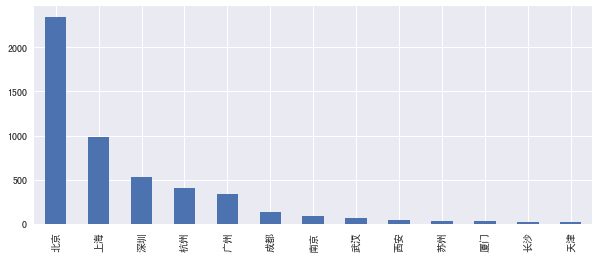

In [11]:
plt.figure(figsize=(10,4))
position_df.city.value_counts().plot.bar()

全国数据分析相关岗位需求最旺盛的城市为北上深杭广

### 1.2 行业领域

In [189]:
#查看一个岗位的行业领域组成
position_df.industryField.str.split('、|,',expand=True).head()

,0,1
0,移动互联网,None
1,金融,None
2,移动互联网,None
3,企业服务,数据服务
4,其他,None


In [190]:
#查看一下行业领域这个字段最多由几个词构成
position_df[position_df.industryField.map(lambda x:True if len(x)>10 else False)].head()

,positionId,city,companyId,firstType,secondType,education,industryField,positionAdvantage,positionName,positionLables,salary,workYear,bottom,top,average
600,1909455,上海,11007,技术,后端开发,本科,"移动互联网 ,医疗健康",期权，年终奖，顶级工作环境,数据工程师,['数据'],10k-18k,3-5年,10,18,14.0
1043,2097504,深圳,25546,技术,后端开发,本科,"移动互联网 ,电子商务","年底双薪,年终奖,五险一金,有补贴",大数据工程师(流计算方向),"['大数据', '数据']",10k-20k,1-3年,10,20,15.0
1070,2097527,深圳,25546,技术,后端开发,本科,"移动互联网 ,电子商务","五险一金,年终奖,年底双薪,有补贴",大数据工程师(基础平台方向),"['平台', '大数据', '数据']",10k-20k,1-3年,10,20,15.0
1402,2163182,深圳,23863,技术,后端开发,本科,"移动互联网 ,电子商务","16薪以上,福利多多,美女多多,弹性工作制",大数据系统架构师,"['大数据', '架构师', '数据', '系统']",25k-38k,5-10年,25,38,31.5
1542,2519328,北京,29299,运营,运营,大专,"移动互联网 ,数据服务",互联网行业、平台大、氛围好、转正机会,数据实习生,['数据'],2k-4k,应届毕业生,2,4,3.0


In [14]:
if_df=position_df.industryField.str.replace('\s+','').str.split('、|,',expand=True)

In [15]:
if_df.head()

,0,1
0,移动互联网,None
1,金融,None
2,移动互联网,None
3,企业服务,数据服务
4,其他,None


In [16]:
if_ss=pd.concat([if_df.loc[:,0],if_df.loc[:,1]])#可以直接用堆栈stack或者unstack并成一列

In [17]:
if_ss.value_counts()

移动互联网    2774
金融       1152
数据服务     1006
电子商务      771
O2O       574
企业服务      463
文化娱乐      215
其他        143
游戏        129
教育        128
广告营销      113
生活服务      112
硬件         90
信息安全       90
医疗健康       82
社交网络       78
旅游         72
分类信息       25
招聘         14
dtype: int64

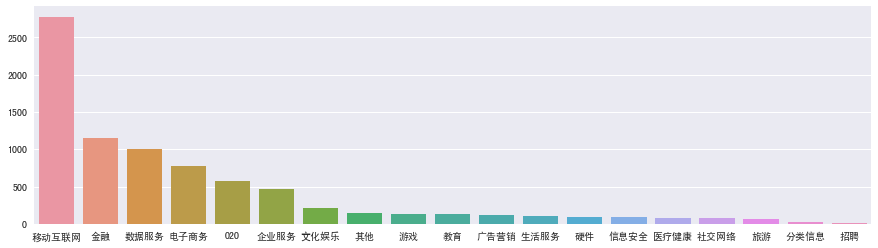

In [18]:
plt.figure(figsize=(15,4))
sns.barplot(if_ss.value_counts().index,if_ss.value_counts().values)

从行业领域的需求来看，移动互联网居首(现在大部分互联网公司都能打移动互联网的标吧)。
然后就是金融、数据服务、电子商务、O2O、企业服务，其他领域对于数据分析相关岗位的需求就没有那么高了，
当然需求低也可能是因为行业本身的门槛较高，所以行业的公司本身就比较少，比如信息安全、硬件、医疗健康。

### 1.3 工作类型划分

#### 第一工作类型

In [19]:
position_df.firstType.value_counts()

技术           2436
产品            543
设计            399
运营            398
市场与销售         388
金融            342
开发/测试/运维类     201
产品/需求/项目类     166
职能             63
金融类            44
运营/编辑/客服       26
市场/商务/销售类      13
综合职能类           4
其他              3
其它              1
Name: firstType, dtype: int64

In [20]:
#由于很多类别同属一个大类，所以对position_df中的first_Type进行修改
ft_map={
    '技术':'技术',
    '产品':'产品',
    '设计':'设计',
    '运营':'运营',
    '市场与销售':'市场与销售',
    '金融':'金融',
    '职能':'职能',
    '开发/测试/运维类':'技术',
    '产品/需求/项目类':'产品',
    '金融类':'金融',
    '运营/编辑/客服':'运营',
    '市场/商务/销售类':'市场与销售',
    '综合职能类':'职能',
    '其他':'职能',
    '其它':'职能'}
position_df['firstType']=position_df.firstType.map(ft_map)

In [21]:
position_df.firstType.value_counts()

技术       2637
产品        709
运营        424
市场与销售     401
设计        399
金融        386
职能         71
Name: firstType, dtype: int64

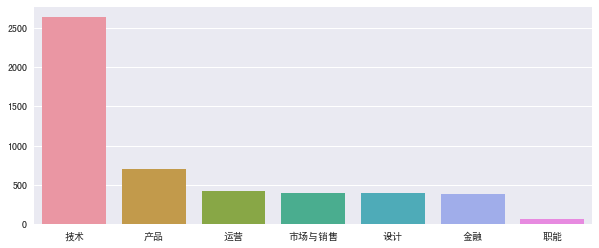

In [22]:
plt.figure(figsize=(10,4))
sns.barplot(position_df.firstType.value_counts().index,position_df.firstType.value_counts().values)

第一工作类型中，大部分的数据岗位被划分到技术类中，然后是产品、运营，设计、市场、设计、金融，职能类的少到几乎没有

#### 第二工作类型

In [191]:
position_df.secondType.value_counts().head(10)

后端开发          1269
数据分析           431
数据开发           408
运营             385
产品经理           296
产品经理/产品设计师     256
DBA            195
高端技术职位         179
用户研究           175
运维安全           167
Name: secondType, dtype: int64

由于第二工作类型太多，所以我们选取前7个作图

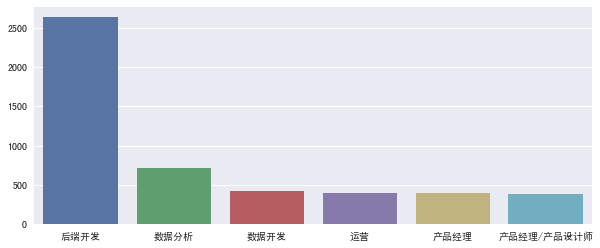

In [24]:
plt.figure(figsize=(10,4))
sns.barplot(position_df.secondType.value_counts().iloc[:6].index,
            position_df.firstType.value_counts().iloc[:6].values)

In [25]:
position_df[position_df.secondType=='后端开发'].head()

,positionId,city,companyId,firstType,secondType,education,industryField,positionAdvantage,positionName,positionLables,salary,workYear
6,1449715,上海,2002,技术,后端开发,本科,"移动互联网,电子商务",薪资福利待遇好，晋升空间大,数据工程师,['数据'],7k-14k,应届毕业生
8,2416852,上海,121208,技术,后端开发,本科,"移动互联网,医疗健康","扁平管理,上升空间大,领导好,弹性工作",数据处理工程师（实习生）,"['后端开发', '数据']",4k-8k,应届毕业生
9,1605795,上海,58109,技术,后端开发,本科,电子商务,向大牛学习，有留司机会,数据处理实习生,['数据'],2k-4k,应届毕业生
10,2157863,上海,1938,技术,后端开发,本科,"移动互联网,游戏",带薪年假 节日福利 出国机会 萌妹纸多,大数据平台开发实习生,"['平台', '大数据', '数据']",5k-6k,应届毕业生
14,2392372,上海,48294,技术,后端开发,硕士,"电子商务,社交网络",旺旺集团旗下电商，扁平管理，人性化环境,数据工程师(大数据方向实习生),"['大数据', '数据']",4k-8k,应届毕业生


数据相关岗位在后端开发中需求的最多，后端开发中包含了数据分析进阶后的数据挖掘和机器学习等，也包含了数据平台的一些开发工种，
其次才是偏向业务的数据分析，在后面的数据运营和数据产品经理都是数据分析师未来可以转型的方向

### 1.4 岗位标签

In [26]:
pl_df=position_df.positionLables.str.replace('\[|\]|\'|\s','').str.split(',',expand=True)

In [192]:
pl_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,分析师,数据分析,数据挖掘,数据,None,None,None,None,None,None,None,None,None
1,分析师,数据分析,数据挖掘,数据,None,None,None,None,None,None,None,None,None
2,分析师,数据分析,数据,None,None,None,None,None,None,None,None,None,None
3,商业,分析师,大数据,数据,None,None,None,None,None,None,None,None,None
4,分析师,数据分析,数据,BI,None,None,None,None,None,None,None,None,None


In [28]:
pl_df.unstack().value_counts().head(12)

数据      4260
分析师     1639
数据分析    1593
大数据     1483
产品       536
数据库      475
产品经理     470
数据挖掘     356
数据仓库     251
架构师      213
BI       201
需求分析     188
dtype: int64

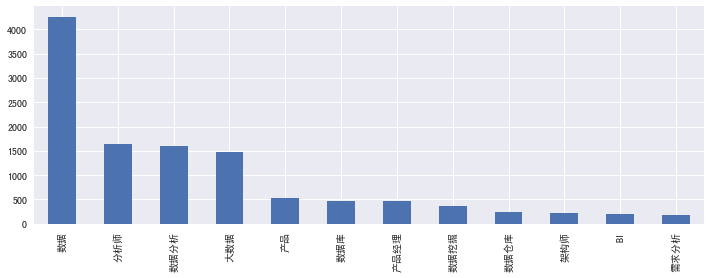

In [29]:
pl_df.unstack().value_counts().head(12).plot.bar(figsize=(12,4))

我们可以看到，这些岗位的热门标签大致就是这些

### 1.5 薪资分析

In [30]:
position_df.salary.head()

0      7k-9k
1    10k-15k
2      4k-6k
3      6k-8k
4      2k-3k
Name: salary, dtype: object

下面来看大家最关心的薪资问题，选择数据相关的岗位究竟能有怎样一个薪资呢？

In [31]:
salary_df=position_df.salary.str.split('-',expand=True)

In [32]:
salary_df.columns=['bottom','top']

In [33]:
salary_df=salary_df.apply(lambda x:x.str.replace('\D',''))

In [34]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5031 entries, 0 to 5030
Data columns (total 2 columns):
bottom    5031 non-null object
top       4992 non-null object
dtypes: object(2)
memory usage: 78.7+ KB


发现存在空值，看看是怎么回事

In [35]:
salary_df[salary_df.top.isnull()].head()

,bottom,top
146,15,None
232,8,None
252,15,None
307,8,None
510,10,None


In [36]:
salary_df.loc[salary_df.top.isnull(),'top']=salary_df.loc[salary_df.top.isnull()].bottom

In [37]:
#将字符串转为数值
salary_df=salary_df.astype('int')

In [38]:
#计算薪资平均值
salary_df['average']=(salary_df.bottom+salary_df.top)/2

In [39]:
position_df=pd.concat([position_df,salary_df],axis=1)

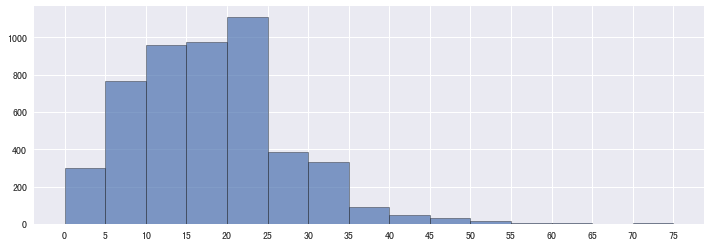

In [40]:
plt.figure(figsize=(12,4))
plt.hist(salary_df.average,bins=np.arange(0,80,5),alpha=0.7,rwidth=1,edgecolor='black',linewidth=0.5)
plt.xticks(np.arange(0,80,5))
plt.show()

似乎有些出乎人的意料，20-25k居然是占比最高的，这和岗位类型应该也有关系，  
在同等工作经验下，偏业务的数据分析师的薪资应该要低于偏技术的数据挖掘和数据开发

### 1.6 学历分析

In [41]:
position_df.education.value_counts()

本科    3835
大专     615
硕士     288
不限     287
博士       6
Name: education, dtype: int64

In [42]:
education_percent=position_df.education.value_counts()/(position_df.education.value_counts().sum())

In [43]:
education_percent

本科    0.762274
大专    0.122242
硕士    0.057245
不限    0.057046
博士    0.001193
Name: education, dtype: float64

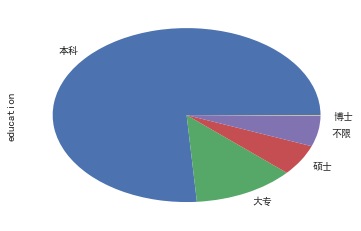

In [44]:
education_percent.plot.pie()

有些人会想，我进入数据相关行业要不要考个研究生，这个数据和饼图可以给你答案，其中本科的要求达到76%，不限学历、大专和本科占到95%，所以拥有本科文凭起码在学历上已经满足95%的企业招聘要求了

### 1.7 工作经验分析

In [45]:
position_df.workYear.value_counts()

3-5年     1849
1-3年     1657
不限        728
5-10年     592
应届毕业生     135
1年以下       52
10年以上      18
Name: workYear, dtype: int64

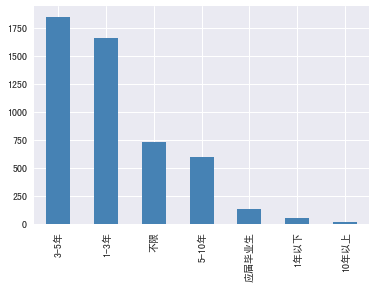

In [46]:
position_df.workYear.value_counts().plot.bar(color='steelblue')

可以看到数据相关的岗位对3-5年工作经验的人才需求是最旺盛的，其次是1-3年工作经验的。   
毕竟这个领域发展也没多少年，所以有5年以上丰富经验的人毕竟是少数，相对其他行业来说经验要求没有显得很高。  
本身应该也有不少人是转岗或者转行过去做的，我相信对于半路出家的转行者来说这应该是好事。

## 2. 多因素分析

In [48]:
position_df.head()

,positionId,city,companyId,firstType,secondType,education,industryField,positionAdvantage,positionName,positionLables,salary,workYear,bottom,top,average
0,2537336,上海,8581,技术,数据开发,硕士,移动互联网,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生,7,9,8.0
1,2427485,上海,23177,技术,数据开发,本科,金融,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生,10,15,12.5
2,2511252,上海,57561,设计,数据分析,本科,移动互联网,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生,4,6,5.0
3,2427530,上海,7502,市场与销售,数据分析,本科,"企业服务,数据服务",五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生,6,8,7.0
4,2245819,上海,130876,技术,软件开发,本科,其他,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生,2,3,2.5


### 2.1 地域和薪资

In [49]:
#可用的作图样式
plt.style.available 

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

(0, 50)

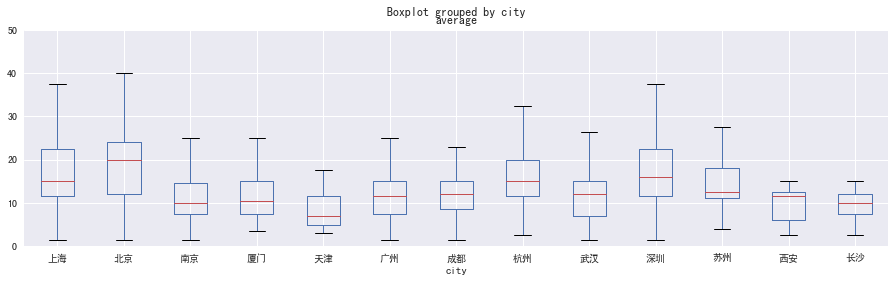

In [51]:
#使用pandas封装的pyplot做箱线图，无需自己建立group
plt.figure(figsize=(15,4))
ax1=plt.subplot()
position_df.boxplot('average','city',ax=ax1)
plt.ylim(0,50)

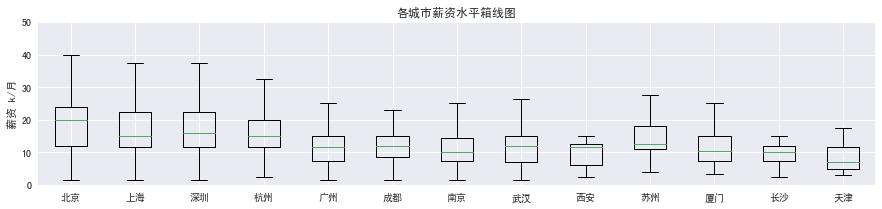

In [52]:
#各城市薪资箱线图，按岗位数量排位
level=position_df.city.value_counts().index
salary_list=[]
for i in level:
    salary_list.append(position_df[position_df.city==i].average)
plt.figure(figsize=(15,3))
plt.boxplot(salary_list,labels=position_df.city.value_counts().index)
plt.ylim(0,50)
plt.title('各城市薪资水平箱线图')
plt.ylabel('薪资 k/月')
plt.show()

从各城市薪资水平箱线图来看，岗位数量前四的北上深杭也是位列前四，但北京的薪资中位数明显高出另外三个top城市一截，差距大于5k。   
到广州薪资就掉出第一梯队了，几乎和需求量较少的城市没差多少，但是广州貌似生活成本也不低啊，赚钱效应会不会使更多广州的从业者往其他top城市跑呢。    
让我比较意外的是苏州薪资水平居然这么好，看来苏州也在准一线城市中默默往上爬。   
西安和天津则是薪资水平最低的两个城市，西安低挡位的薪资比较拖后腿，它的薪资中位数还是高的，天津属于所有指标都是最低的。

### 2.2 岗位类别和薪资

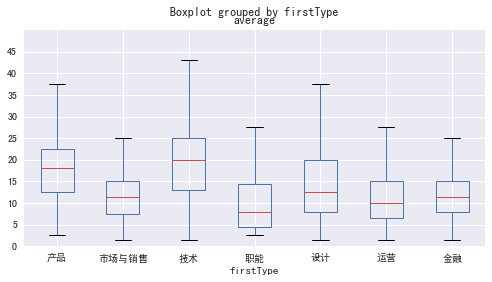

In [53]:
position_df.boxplot('average','firstType',figsize=(8,4))
plt.yticks(range(0,50,5))
plt.ylim(0,50)
plt.show()

岗位类别和薪资的关系中，毫无疑问，技术的薪资肯定是NO.1的中位数能达到20k，其次是产品，中位数差不多18k，  
然后是设计,再然后是市场、运营、金融，整体水平最低的当属职能分类。

### 2.3 行业类别和薪资

In [54]:
if_ss=position_df.industryField.str.replace('\s+','').str.split('、|,',expand=True)

In [55]:
if_ss.index=position_df.average

In [56]:
#堆栈以后重置索引，得到每个关键词对应薪资
if_ss=if_ss.stack().reset_index().drop('level_1',axis=1)

In [57]:
if_ss.head()

,average,0
0,8.0,移动互联网
1,12.5,金融
2,5.0,移动互联网
3,7.0,企业服务
4,7.0,数据服务


In [58]:
if_ss.columns=['average','industry']

In [59]:
if_ss.industry.value_counts()

移动互联网    2774
金融       1152
数据服务     1006
电子商务      771
O2O       574
企业服务      463
文化娱乐      215
其他        143
游戏        129
教育        128
广告营销      113
生活服务      112
硬件         90
信息安全       90
医疗健康       82
社交网络       78
旅游         72
分类信息       25
招聘         14
Name: industry, dtype: int64

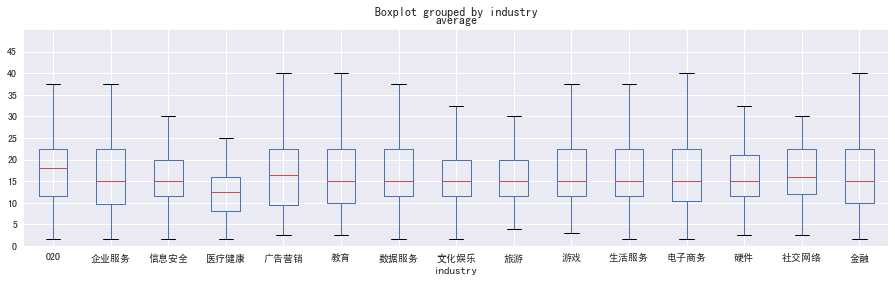

In [60]:
#应该大部分企业都勾了移动互联网，所以这一项不作为分类依据，另外'其他','分类信息','招聘'的参考意义不大，所以也除去
if_ss[~if_ss.industry.isin(['其他','分类信息','招聘','移动互联网'])].boxplot('average','industry',figsize=(15,4))
plt.yticks(range(0,50,5))
plt.ylim(0,50)
plt.show()

在行业领域的薪资中，大部分行业的差距并不明显，只有医疗健康的岗位是显著低于其他行业的，所以医疗健康行业的小伙伴应该都比较希望转到其他行业吧  
从中位数来看，O2O、广告营销、社交网络是高于其他行业的，看来广告行业还是挺赚钱的，还有'新零售'的火热也带动了O2O行业薪水的增长  
最火最高大上的金融行业的整体薪资并没有呈现显著高于其他行业，看来金融的水还是比较深的  
另外一个比较火热的电子商务行业薪水分布和金融大致相同

### 2.4 工作经验和薪资

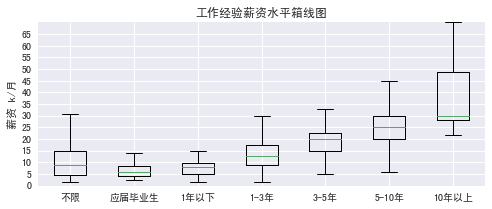

In [61]:
workYear_s_list=[]
for i in ['不限','应届毕业生','1年以下','1-3年','3-5年','5-10年','10年以上']:
    workYear_s_list.append(position_df[position_df.workYear==i].average)
plt.figure(figsize=(8,3))
plt.boxplot(workYear_s_list,labels=['不限','应届毕业生','1年以下','1-3年','3-5年','5-10年','10年以上'],flierprops = {'marker':'*'})
plt.ylim(0,70)
plt.yticks(range(0,70,5))
plt.title('工作经验薪资水平箱线图')
plt.ylabel('薪资 k/月')
plt.show()

总体来看，随着工作经验的增加，薪资上涨还是很明显的，每跨越一个阶段整体都差不多有10k的涨幅  
应届毕业生好一点的公司可以开到差不多15k，甚至有公司开到20k以上，大多数还是集中在5-8k  
1-3年工作经验的基本站上10k没问题，好一点的可以达到20k以上  
3-5年工作经验的中位数都可以达到20k  
5-10年和10年以上的就更加了  

### 2.5 学历和薪资

In [62]:
position_df.education.value_counts()

本科    3835
大专     615
硕士     288
不限     287
博士       6
Name: education, dtype: int64

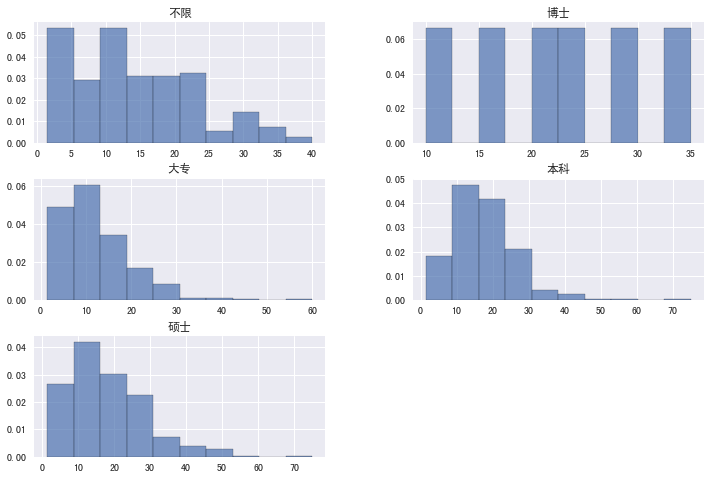

In [63]:
position_df.groupby('education').apply(lambda x:x.average).unstack().T.hist(alpha=0.7,normed=True,figsize=(12,8),edgecolor='black')
plt.show()

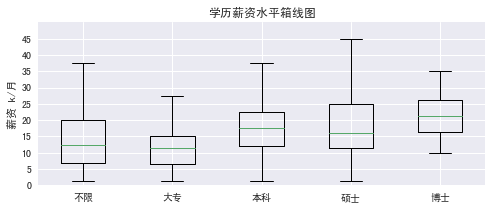

In [64]:
education_s_list=[]
for i in ['不限','大专','本科','硕士','博士']:
    education_s_list.append(position_df[position_df.education==i].average)
plt.figure(figsize=(8,3))
plt.boxplot(education_s_list,labels=['不限','大专','本科','硕士','博士'],flierprops = {'marker':'*'})
plt.ylim(0,50)
plt.yticks(range(0,50,5))
plt.title('学历薪资水平箱线图')
plt.ylabel('薪资 k/月')
plt.show()

从学历上来看，大专的下限低，上限也低。
本科和硕士相比，有一个更高的中位数，这个可能是因为招硕士的岗位对工作经验要求不高，所以很多都是应届生，薪资自然不如相对有工作经验的本科生。
但是硕士的薪资上限更高，本科生想要更高的薪资需要工作经验的累积，才能弥补学历上的不足，本科的异常值应该都是工作经验要求很高的。
博士生只有6个岗位要求，所以参考价值不大，但很明显博士生的下限是高于其他所有学历的

### 2.6 岗位名称和薪资

由于这份招聘数据爬取的不单单是数据分析师，还有数据挖掘|算法|机器学习以及一些和数据平台相关的开发岗位以及和数据产品相关的产品岗位，  
之前的岗位类别不一定有代表性，所以从岗位名称来看看这些岗位的薪资差异

#### 分析、挖掘、产品、开发四类岗位

In [70]:
#岗位名称包含分析的所有薪资
fenxi_ss=position_df[position_df.positionName.str.contains('分析')].average

In [71]:
#岗位名称包含产品的所有薪资
chanpin_ss=position_df[position_df.positionName.str.contains('产品')].average

In [72]:
#岗位名称包含工程师但不包含挖掘|算法|机器学习的所有薪资
kaifa_ss=position_df[(position_df.positionName.str.contains('工程师|开发|研发'))&
            (~position_df.positionName.str.contains('挖掘|算法|机器学习|分析'))].average

In [73]:
#岗位名称包含挖掘|算法|机器学习的所有薪资
wajue_ss=position_df[position_df.positionName.str.contains('挖掘|算法|机器学习')].average

In [332]:
fenxi_ss.shape,wajue_ss.shape,chanpin_ss.shape,kaifa_ss.shape

((2330,), (161,), (542,), (1442,))

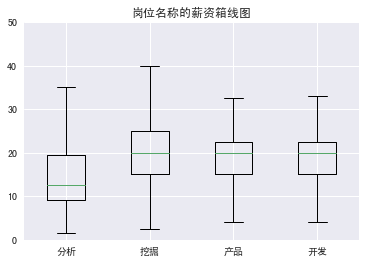

In [74]:
plt.boxplot([fenxi_ss,wajue_ss,chanpin_ss,kaifa_ss],labels=['分析','挖掘','产品','开发'],flierprops = {'marker':'*'})
plt.title('岗位名称的薪资箱线图')
plt.ylim(0,50)
plt.show()

可以看到偏业务的数据分析师大部分薪资集中在10-20k，而偏技术的挖掘｜算法岗集中在15-25k。  
下面从直方图来看看各个类别的上限情况

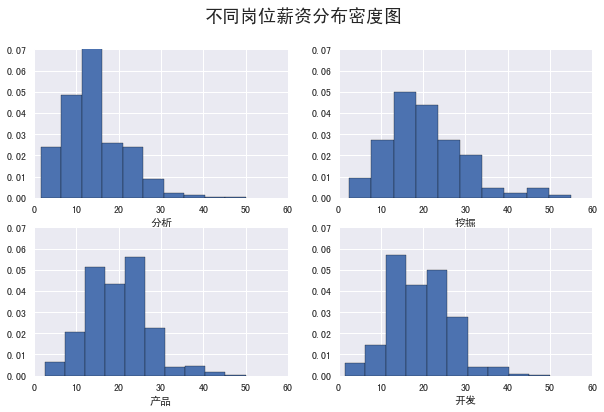

In [89]:
plt.figure(figsize=(10,6),)
plt.subplot(2,2,1)
plt.hist(fenxi_ss[fenxi_ss<60],normed=True,bins=10,edgecolor='black')
plt.xlabel('分析')
plt.xlim(0,60)
plt.ylim(0,0.07)
plt.subplot(2,2,2)
plt.hist(wajue_ss[wajue_ss<60],normed=True,bins=10,edgecolor='black')
plt.xlabel('挖掘')
plt.xlim(0,60)
plt.ylim(0,0.07)
plt.subplot(2,2,3)
plt.hist(chanpin_ss[chanpin_ss<60],normed=True,bins=10,edgecolor='black')
plt.xlabel('产品')
plt.xlim(0,60)
plt.ylim(0,0.07)
plt.subplot(2,2,4)
plt.hist(kaifa_ss[kaifa_ss<60],normed=True,bins=10,edgecolor='black')
plt.xlabel('开发')
plt.xlim(0,60)
plt.ylim(0,0.07)
plt.suptitle('不同岗位薪资分布密度图',fontsize=18)
plt.show()

从直方图可以明显看出，挖掘岗的在高段位的薪资相比其他几个类别占比最高，说明挖掘的薪资上限很高。  
分析岗是低段位薪资占比最高的，产品和开发岗位是中间段薪资占比相对较高的

#### 大数据和非大数据

当前大数据这么火，那么在运用大数据的公司和非大数据公司薪资上有差别吗？

In [76]:
#大数据岗位名称大多会包含大数据或者数据仓库
bigdb_ss=position_df[position_df.positionName.str.contains('大数据|数据仓库')].average

In [77]:
#非大数据title的岗位
notbigdb_ss=position_df[~position_df.positionName.str.contains('大数据|数据仓库')].average

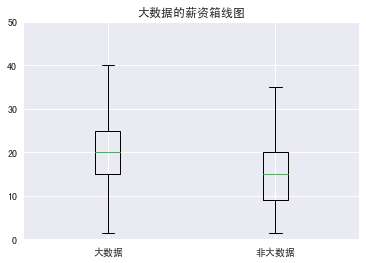

In [92]:
plt.boxplot([bigdb_ss,notbigdb_ss],labels=['大数据','非大数据'],flierprops = {'marker':'*'})
plt.title('大数据的薪资箱线图')
plt.ylim(0,50)
plt.show()

差距也是挺明显的，大数据总体薪资比非大数据高一阶

### 2.7 学历和岗位名称

既然挖掘岗的薪资上限最高，而且薪资普遍在高段位，产品岗和开发岗的薪资也较分析岗更高，  
所以做偏业务的数据分析师在后期可以选择往其中一个方向走，开发方向和分析的关系不是很大，是纯技术。  
所以主要可以考虑偏技术的挖掘方向和偏产品的产品方向。
那这些方向对学历的要求高吗？我们来看看

In [79]:
fenxi_edu_ss=position_df[position_df.positionName.str.contains('分析')].education
chanpin_edu_ss=position_df[position_df.positionName.str.contains('产品')].education
kaifa_edu_ss=position_df[(position_df.positionName.str.contains('工程师'))&
            (~position_df.positionName.str.contains('挖掘|算法|机器学习'))].education
wajue_edu_ss=position_df[position_df.positionName.str.contains('挖掘|算法|机器学习')].education

In [80]:
fenxi_edu_ss=fenxi_edu_ss.value_counts()/fenxi_edu_ss.value_counts().sum()
chanpin_edu_ss=chanpin_edu_ss.value_counts()/chanpin_edu_ss.value_counts().sum()
kaifa_edu_ss=kaifa_edu_ss.value_counts()/kaifa_edu_ss.value_counts().sum()
wajue_edu_ss=wajue_edu_ss.value_counts()/wajue_edu_ss.value_counts().sum()

In [81]:
ps_edu_df=pd.concat([fenxi_edu_ss,chanpin_edu_ss,kaifa_edu_ss,wajue_edu_ss],axis=1)

In [82]:
ps_edu_df.columns=['分析','产品','开发','挖掘']

In [83]:
ps_edu_df

,分析,产品,开发,挖掘
不限,0.056652,0.046125,0.053398,0.055901
博士,0.002146,0.001845,NaN,0.006211
大专,0.145064,0.068266,0.083911,0.080745
本科,0.729614,0.859779,0.825936,0.689441
硕士,0.066524,0.023985,0.036755,0.167702


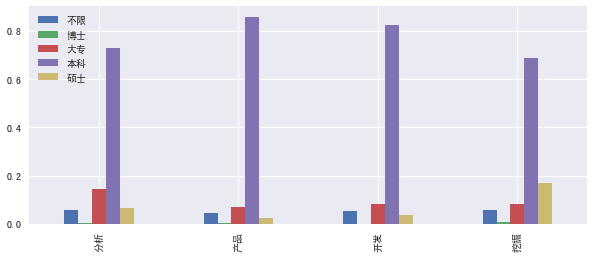

In [84]:
ps_edu_df.T.plot.bar(figsize=(10,4))

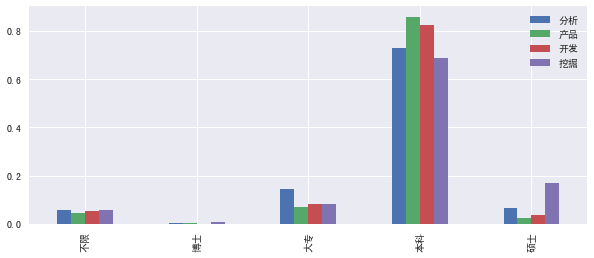

In [85]:
ps_edu_df.plot.bar(figsize=(10,4))

可以看出挖掘岗对学历要求相对其他岗位是最高的，硕士要求几乎快接近20%了

### 2.8 工作经验和学历(分析和挖掘比较)

那么挖掘的本科学历要求基础上会不会相比分析的本科对工作经验要求更多呢，来看看

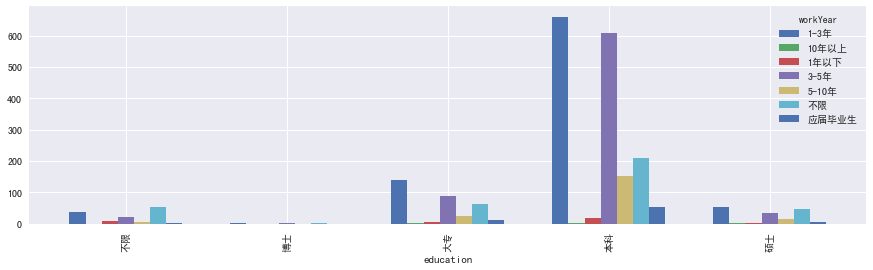

In [117]:
position_df[position_df.positionName.str.contains('分析')].pivot_table(index='education',
            columns='workYear',values='top',aggfunc='count').plot.bar(figsize=(15,4),width=0.7)
plt.show()

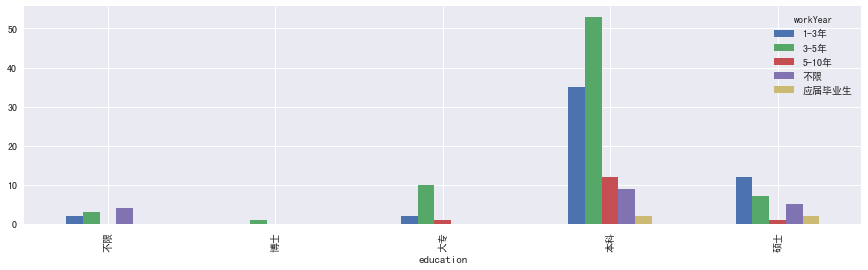

In [120]:
position_df[position_df.positionName.str.contains('挖掘|算法|机器学习')].pivot_table(index='education',
            columns='workYear',values='top',aggfunc='count').plot.bar(figsize=(15,4))
plt.show()

分析对于本科学历的经验要求最多的是1-3年，而挖掘则是3-5年  
可以看出如果做挖掘要求的是本科学历，则经验要求会比分析还高很多

### 2.9 工作经验和学历和薪资

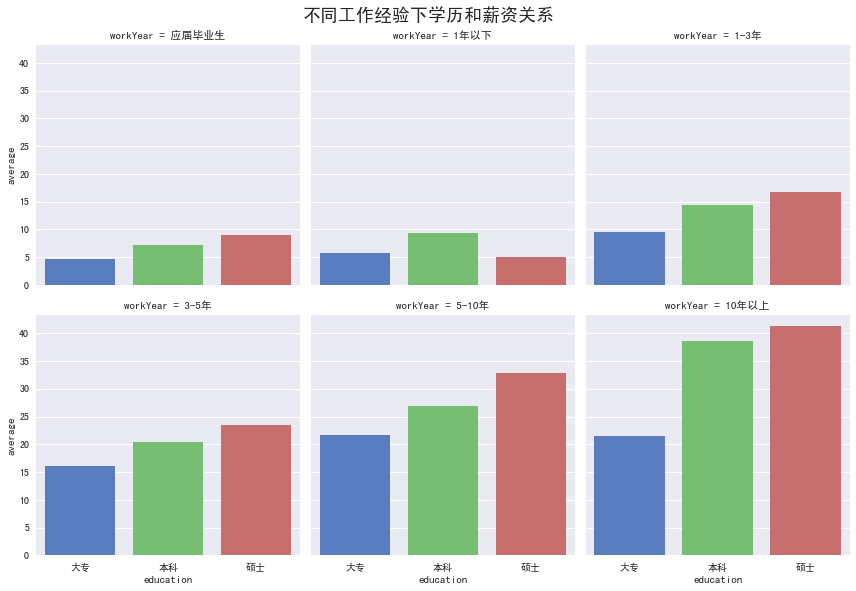

In [177]:
sns.factorplot('education','average',data=position_df[(position_df.workYear!='不限')
               &(position_df.education!='博士')&(position_df.education!='不限')],
               order=['大专','本科','硕士'],
               kind='bar',ci=False,col='workYear',col_wrap=3,
               col_order=['应届毕业生','1年以下','1-3年','3-5年','5-10年','10年以上'],palette='muted')
plt.suptitle('不同工作经验下学历和薪资关系',y=1.02,fontsize=18)
plt.show()

## 关联公司信息多因素交叉分析

多因子  
1.公司规模和薪资  
2.公司规模和学历  
3.公司规模和岗位类别(名称)和学历  
4.公司规模和岗位类别(名称)和薪资  

In [196]:
fullinfo_df=pd.merge(position_df,company_df,on='companyId',how='left')

In [197]:
fullinfo_df.head()

,positionId,city,companyId,firstType,secondType,education,industryField,positionAdvantage,positionName,positionLables,salary,workYear,bottom,top,average,companyFullName,companyLabelList,companyShortName,companySize,businessZones
0,2537336,上海,8581,技术,数据开发,硕士,移动互联网,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生,7,9,8.0,纽海信息技术(上海)有限公司,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江']
1,2427485,上海,23177,技术,数据开发,本科,金融,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生,10,15,12.5,上海点荣金融信息服务有限责任公司,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']"
2,2511252,上海,57561,设计,数据分析,本科,移动互联网,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生,4,6,5.0,上海晶樵网络信息技术有限公司,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥']
3,2427530,上海,7502,市场与销售,数据分析,本科,"企业服务,数据服务",五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生,6,8,7.0,杭州数云信息技术有限公司上海分公司,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']"
4,2245819,上海,130876,技术,软件开发,本科,其他,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生,2,3,2.5,上海银基富力信息技术有限公司,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']"


In [211]:
company_df.companyId.nunique()

2296

In [210]:
company_df.companyFullName.nunique()

2262

In [266]:
#查看每一个公司注册了几个招聘账号，并显示公司规模
company_uni_df=fullinfo_df.groupby(['companyId','companyFullName']).companySize.max().reset_index().groupby('companyFullName').\
agg({'companyId':'count','companySize':'max'}).sort_values('companyId',ascending=False)
company_uni_df.head()

,companyId,companySize
companyFullName,,
武汉佰钧成技术有限责任公司,3,2000人以上
58到家,2,2000人以上
北京高策房地产经纪有限公司,2,500-2000人
天津五八到家生活服务有限公司,2,2000人以上
北京捷通华声科技股份有限公司,2,150-500人


有同一个公司用多个ID,代表的是注册多个账号，基本都是一些大公司

### 3.1 各公司招聘人数分析

In [247]:
pos_num_df=fullinfo_df.groupby('companyFullName').top.count().value_counts().reset_index().sort_values('index')

In [251]:
pos_num_df.columns=['招聘人数','公司数量']

In [256]:
pos_num_df

,招聘人数,公司数量
0,1,1474
1,2,357
2,3,158
3,4,70
4,5,50
5,6,34
6,7,26
10,8,10
7,9,17
8,10,13


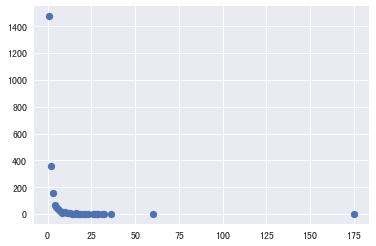

In [264]:
plt.scatter('招聘人数','公司数量',data=pos_num_df)

### 3.2 公司规模分析

In [270]:
company_df.groupby('companyFullName').companySize.max().value_counts()

150-500人     572
50-150人      528
15-50人       379
500-2000人    360
2000人以上      344
少于15人         79
Name: companySize, dtype: int64

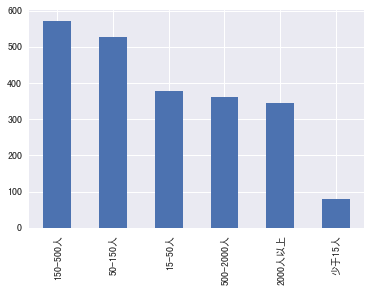

In [272]:
company_df.groupby('companyFullName').companySize.max().value_counts().plot.bar()

招聘数据相关岗位的150-500人的中型公司最多，其次是50-150的中小型，然后是15-50人的小公司  
中大型和大型公司也非常多，相比作坊式小公司的淘宝天猫运营行业，数据岗位所属行业的公司规模显然要大很多

### 3.3 公司规模和薪资

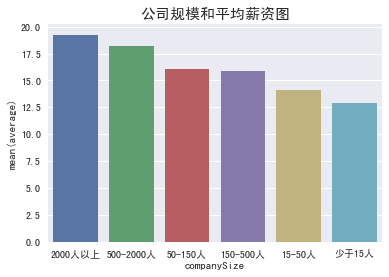

In [294]:
sns.barplot(fullinfo_df.companySize,fullinfo_df.average,ci=False)
plt.title('公司规模和平均薪资图',fontsize=15)
plt.show()

In [ ]:
sns.distplot()

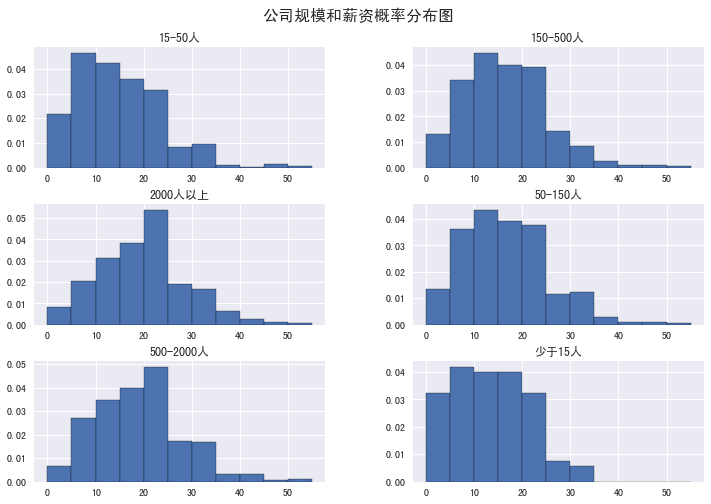

In [300]:
#此处采用groupby后unstack后转置得到每一公司规模类别对应的薪资列，也可以写for语句按公司规模逐个画图
fullinfo_df.groupby('companySize').apply(lambda x:x.average).\
unstack().T.hist(figsize=(12,8),edgecolor='black',bins=range(0,60,5),normed=1)
plt.suptitle('公司规模和薪资概率分布图',y=0.95,fontsize=16)
plt.show()

薪资基本上和公司规模成正比，这可能和大公司招的岗位要求更高有关，就像前面大数据岗位和非大数据岗位薪资有差距一样

### 3.4 公司规模和学历

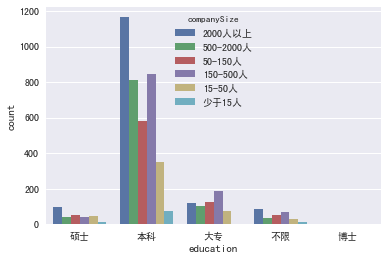

In [311]:
sns.countplot(fullinfo_df.education,hue=fullinfo_df.companySize)#没法统计占比,大公司本身招聘人数多，所以没有比较意义

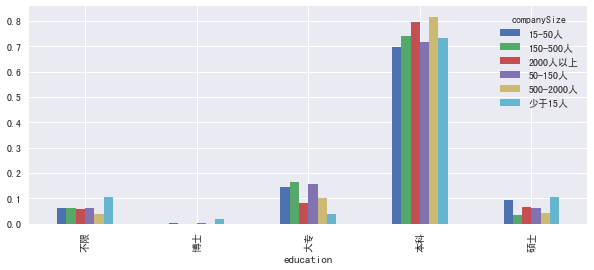

In [325]:
#用pyplot根据各规模公司的各学历占比来比较
pd.crosstab(fullinfo_df.companySize,fullinfo_df.education).apply(lambda x:x/x.sum(),axis=1).T.plot.bar(figsize=(10,4))

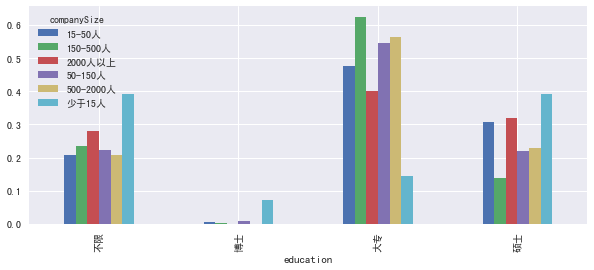

In [324]:
#除去本科学历看清楚一点
pd.crosstab(fullinfo_df.companySize,fullinfo_df.education).drop('本科',axis=1).\
apply(lambda x:x/x.sum(),axis=1).T.plot.bar(figsize=(10,4))
plt.show()

似乎对硕士的需求比例更高的是少于15人的小公司，这个和小公司样本比例小也有关系。  
但2000人以上的大公司对学历要求还是相比较其他几个更高的，中型公司150-500人对学历的要求似乎没有那么高，  
一个原因可能是这个阶段的公司对人才需求比较急切，所以在学历上放宽了要求

### 3.5 公司规模和岗位名称和学历

In [369]:
#岗位名称打标
fullinfo_df['pos_tp']='其他'
fullinfo_df.loc[fullinfo_df.positionName.str.contains('分析'),'pos_tp']='分析'
fullinfo_df.loc[fullinfo_df.positionName.str.contains('产品'),'pos_tp']='产品'
fullinfo_df.loc[(fullinfo_df.positionName.str.contains('工程师|开发|研发|数据仓库|架构|技术'))&
            (~fullinfo_df.positionName.str.contains('挖掘|算法|机器学习|分析')),'pos_tp']='开发'
fullinfo_df.loc[fullinfo_df.positionName.str.contains('挖掘|算法|机器学习|建模|科学家'),'pos_tp']='挖掘'

In [387]:
#由于分类较多，所以这里我们只分析本科和硕士学历以及分析和挖掘岗
fenxiwajue_df=fullinfo_df.query("(education=='本科'|education=='硕士')&(pos_tp=='分析'|pos_tp=='挖掘')\
                                &(companySize!='少于15人')")

In [418]:
fullinfo_df.workYear.value_counts()

3-5年     1849
1-3年     1657
不限        728
5-10年     592
应届毕业生     135
1年以下       52
10年以上      18
Name: workYear, dtype: int64

In [419]:
compsize_L=['2000人以上','500-2000人','150-500人','50-150人','15-50人']
postp_L=['分析','挖掘']
wy_L=['1-3年','3-5年','5-10年']

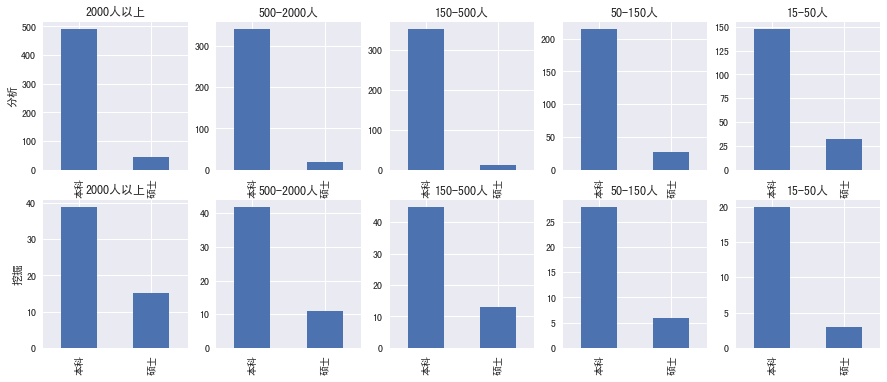

In [415]:
#在招聘分析岗和挖掘岗时，不同规模的公司对于学历的要求分析
for i in range(2):
    for j in range(1,6):
        plt.subplot(2,5,i*5+j)
        fenxiwajue_df[(fenxiwajue_df.companySize==compsize_L[j-1])&(fenxiwajue_df.pos_tp==postp_L[i])].\
        education.value_counts().plot.bar(figsize=(15,6))
        plt.title(compsize_L[j-1])
        if i*5+j==1:
            plt.ylabel('分析')
        if i*5+j==6:
            plt.ylabel('挖掘')

显然，大公司的挖掘岗中硕士的学历要求会更多一点，所以学历上不占优的同学做挖掘想进大厂想必是比较难的了  
那么工作经验能不能弥补学历上的不足呢？我们来看一下

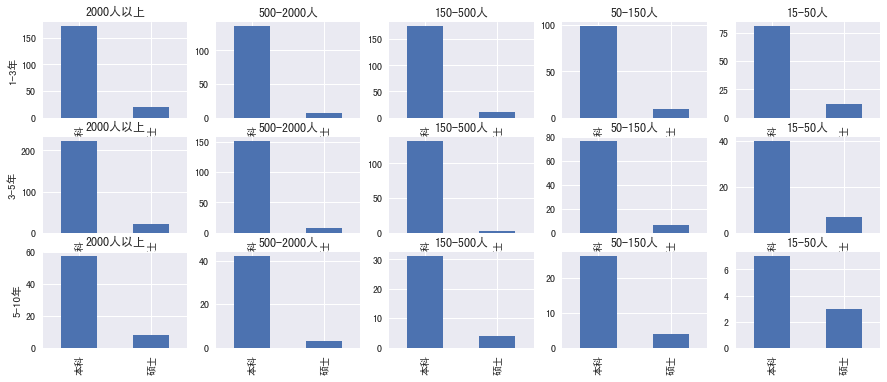

In [421]:
for i in range(3):
    for j in range(1,6):
        plt.subplot(3,5,i*5+j)
        fenxiwajue_df[(fenxiwajue_df.companySize==compsize_L[j-1])&(fenxiwajue_df.workYear==wy_L[i])].\
        education.value_counts().plot.bar(figsize=(15,6))
        plt.title(compsize_L[j-1])
        if i*5+j==1:
            plt.ylabel('1-3年')
        if i*5+j==6:
            plt.ylabel('3-5年')
        if i*5+j==11:
            plt.ylabel('5-10年')

很不幸，公司并没有因为工作经验的增加而降低学历要求，所以做挖掘岗相进大厂的同学还是考个研最好

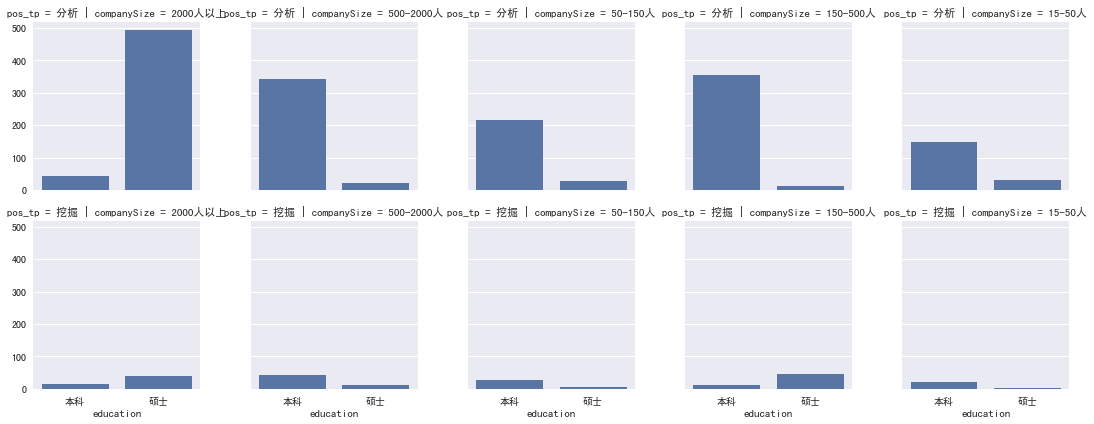

In [416]:
#用seaborn的facetgrid分子图作图错误较多，不推荐
grid=sns.FacetGrid(row='pos_tp',col='companySize',data=fenxiwajue_df)
grid.map(sns.countplot,'education')
grid.add_legend()

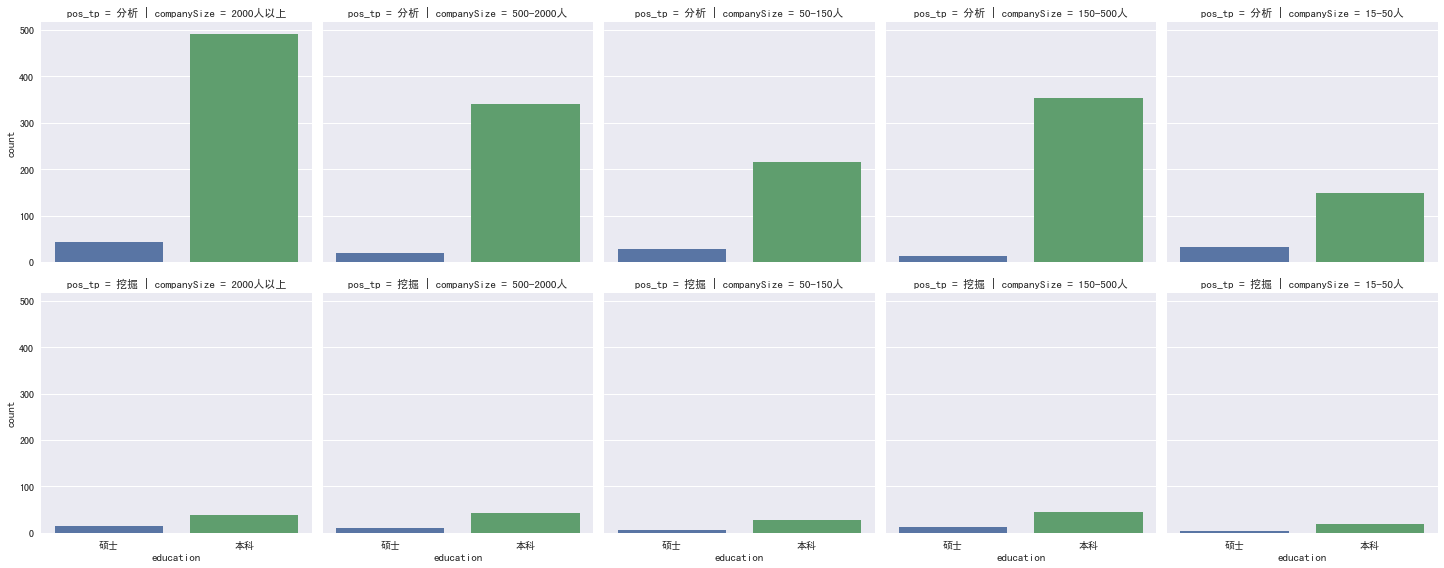

In [417]:
#用seaborn的factorplot分子图作图比较准确，但是对比不如自己写循环画图来得好
sns.factorplot(x='education',row='pos_tp',col='companySize',data=fenxiwajue_df,kind='count')

### 3.6 公司规模和岗位名称和薪资  

#### 比较薪资均值

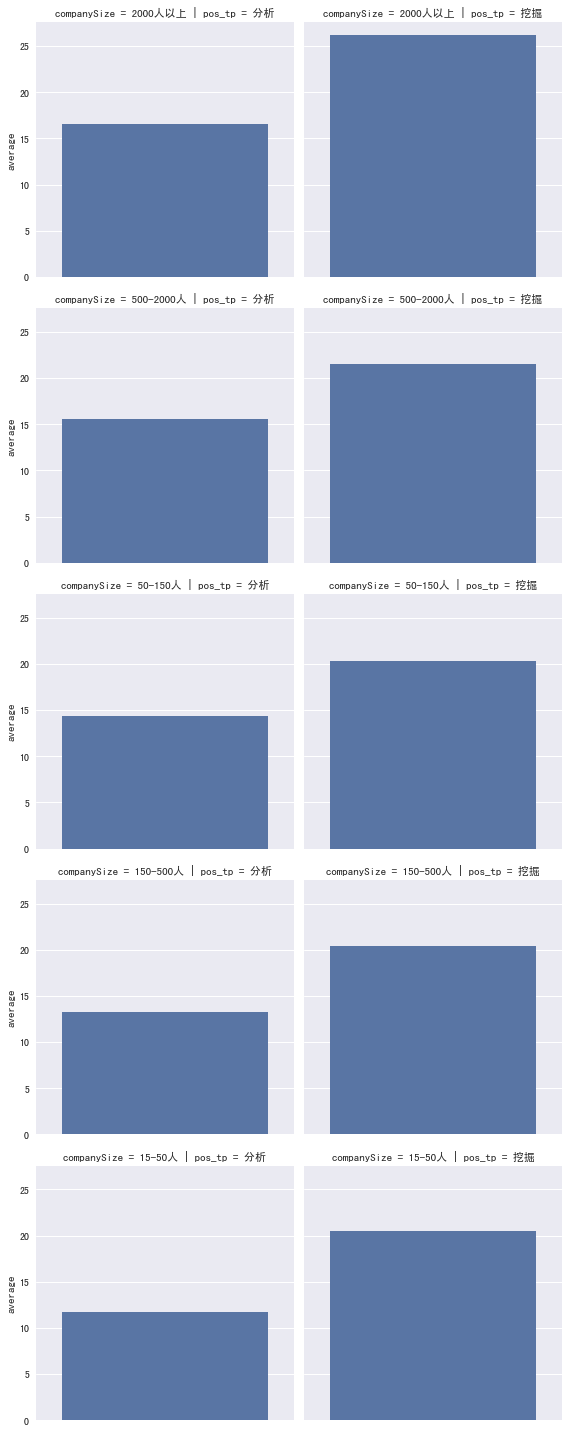

In [439]:
sns.factorplot(y='average',row='companySize',col='pos_tp',data=fenxiwajue_df,kind='bar',ci=False)

####  比较薪资分布

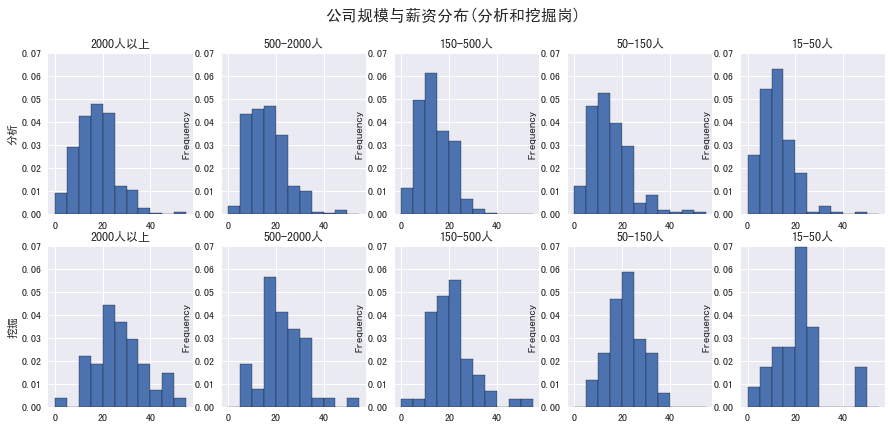

In [441]:
#在招聘分析岗和挖掘岗时，不同规模的公司的薪资分布
for i in range(2):
    for j in range(1,6):
        plt.subplot(2,5,i*5+j)
        fenxiwajue_df[(fenxiwajue_df.companySize==compsize_L[j-1])&(fenxiwajue_df.pos_tp==postp_L[i])].\
        average.plot.hist(figsize=(15,6.5),bins=range(0,60,5),edgecolor='black',normed=1)
        plt.ylim(0,0.07)
        plt.title(compsize_L[j-1])
        if i*5+j==1:
            plt.ylabel('分析')
        if i*5+j==6:
            plt.ylabel('挖掘')
plt.suptitle('公司规模与薪资分布(分析和挖掘岗)',fontsize=16)

显然500人以上的大公司无论是分析岗还是挖掘岗，薪资都高于500人以下的中小型公司

# 二.杭州近期招聘岗位分析

因为笔主是杭州的，所以又爬了拉勾网杭州站近期的数据分析师信息来分析  
下面对笔主最关心的几个问题进行分析

## 0. 数据清洗

In [195]:
hz_df=pd.read_csv('/Users/xucoolboy/practise/拉勾招聘分析/lagou_hz_2.csv')

In [70]:
hz_df.shape

(431, 21)

In [73]:
hz_df.head()

,web-scraper-order,web-scraper-start-url,link,link-href,department,job_title,salary,work_place,work_year,education,...,position_label,publish_time,job_advantage,job_desc,work_addr,company_name,company_industry,company_state,company_scale,company_page
0,1526582932-1072,https://www.lagou.com/jobs/list_%E6%95%B0%E6%8...,数据分析师\n \n ...,https://www.lagou.com/jobs/3333115.html,浙江执御信息技术有限公司运营部门招聘,数据分析师,10k-20k,/杭州 /,经验3-5年 /,学历不限 /,...,资深\n 高级...,09:19 发布于拉勾网,"晋升空间,团队管理,年终奖金,旅游活动",1、负责运营团队管理数据整理工作；\n2、负责kpi核心指标体系持续跟踪工作，相关项目的数据...,杭州市市市 -\n 拱墅区 -\n ...,浙江执御信息技术有限公司\n ...,"移动互联网,数据服务\n 领域",B轮\n 发展阶段,富安娜(A轮)\n 投资机构,2000人以上\n 规模
1,1526575019-737,https://www.lagou.com/jobs/list_%E6%95%B0%E6%8...,三维重建视觉算法工程师--大数据(J13473)\n ...,https://www.lagou.com/jobs/2562334.html,滴滴出行大数据招聘,三维重建视觉算法工程师--...,25k-50k,/杭州 /,经验3-5年 /,硕士及以上 /,...,图像处理\n ...,12:04 发布于拉勾网,15薪、六险一金、期权、体检,工作职责：\n\n1.具有计算机等相关专业本科及以上学历；\n\n2.编程基础扎实，熟悉Li...,杭州市 -\n 西湖区 -\n ...,滴滴出行\n ...,移动互联网\n 领域,不需要融资\n 发展阶段,2000人以上\n 规模,http://www.didichuxing.com\n 公司主页
2,1526580346-1029,https://www.lagou.com/jobs/list_%E6%95%B0%E6%8...,数据分析师\n \n ...,https://www.lagou.com/jobs/3850946.html,深圳雅乐运营部招聘,数据分析师,10k-20k,/杭州 /,经验1-3年 /,本科及以上 /,...,数据分析\n ...,15:19 发布于拉勾网,"做五休二,五险一金,年度体检,无限零食",岗位职责：\n1、 深入理解业务运作和产品特点，通过数据分析建立模型，以获取用户画像；\n2...,杭州 -\n 西湖区 -\n ...,深圳雅乐\n ...,"移动互联网,电子商务\n 领域",A轮\n 发展阶段,50-150人\n 规模,http://www.lagou.com/gong...\n ...
3,1526575618-835,https://www.lagou.com/jobs/list_%E6%95%B0%E6%8...,数据产品经理\n \n ...,https://www.lagou.com/jobs/3596055.html,蜂融网络产品部招聘,数据产品经理,10k-20k,/杭州 /,经验1-3年 /,本科及以上 /,...,云计算\n 大...,09:32 发布于拉勾网,"发展迅速,全员持股,国外旅游,不打卡",【岗位名称】数据产品经理\n【需求人数】1\n【重点要求】\n1、具有大数据、云计算、数据仓...,杭州 -\n 西湖区 -\n ...,蜂融网络\n ...,"移动互联网,金融\n 领域",A轮\n 发展阶段,灵犀资本(A轮)\n 投资机构,50-150人\n 规模
4,1526577279-978,https://www.lagou.com/jobs/list_%E6%95%B0%E6%8...,数据分析专家\n \n ...,https://www.lagou.com/jobs/3990582.html,酷家乐研发部招聘,数据分析专家,22k-35k,/杭州 /,经验3-5年 /,本科及以上 /,...,专家\n 大数...,2天前 发布于拉勾网,期权激励、年度旅游、弹性工作、氛围欢乐,"岗位描述：\n1. 构建全面的、准确的、能反映服务业务线特征的整体指标体系, 并基于业务监控...",杭州 -\n 拱墅区 -\n ...,酷家乐\n ...,移动互联网\n 领域,D轮及以上\n 发展阶段,GGV、IDG、经纬、线性资本、云启资本、赫斯特资本(B轮)，IDG(A轮)\n ...,500-2000人\n 规模


In [196]:
hz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 21 columns):
web-scraper-order        431 non-null object
web-scraper-start-url    431 non-null object
link                     431 non-null object
link-href                431 non-null object
department               431 non-null object
job_title                431 non-null object
salary                   431 non-null object
work_place               431 non-null object
work_year                431 non-null object
education                431 non-null object
work_type                431 non-null object
position_label           424 non-null object
publish_time             431 non-null object
job_advantage            431 non-null object
job_desc                 431 non-null object
work_addr                431 non-null object
company_name             431 non-null object
company_industry         431 non-null object
company_state            431 non-null object
company_scale            431 non-null ob

In [198]:
#去除信息缺失比较多的或者无用的列
hz_df=hz_df.drop(['web-scraper-order','web-scraper-start-url','link','position_label'],axis=1)

In [199]:
#爬虫的时候没爬去的会用字符串null填充，所以删除相应的行
hz_df=hz_df[~(hz_df.department=='null')].reset_index()

In [200]:
#去除这几个字段的无用信息
hz_df['work_place']=hz_df.work_place.str.replace('/','')
hz_df['work_year']=hz_df.work_year.str.replace('/|经验','')
hz_df['company_name']=hz_df.company_name.str.replace('\n','')
hz_df['company_industry']=hz_df.company_industry.str.replace('\n|领域|\s','')
hz_df['company_state']=hz_df.company_state.str.replace('\n|发展阶段|\s','')
hz_df['education']=hz_df.education.str.replace('/|\s','')

In [201]:
#提取公司所在区
hzad=hz_df.work_addr.str.extract('([^杭州市][^州市][区市])')

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [202]:
#发现有异常数据
hzad[hzad.isnull()]

163    NaN
165    NaN
189    NaN
348    NaN
Name: work_addr, dtype: object

In [203]:
hz_df.work_addr.iloc[[163,165,189,348],]

163    - 西斗门路3号\n                                    ...
165    - 阡陌路482号智慧e谷a座16f－18f\n                      ...
189    - 文三路469号黄龙国际中心G座18楼\n                        ...
348    - 五常大道175号\n                                  ...
Name: work_addr, dtype: object

In [204]:
#根据实际信息重新赋值
hz_df.work_addr.iloc[[163,165,189,348],]=['西湖区','滨江区','西湖区','余杭区']

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [205]:
#重新提取所在区
hz_df['work_addr']=hz_df.work_addr.str.extract('([^杭州市][^州市][区市])')

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [206]:
#清除脏数据，提取公司主页
hz_df['home_page']=(hz_df.company_scale+hz_df.company_page).str.extract('(http.*)\n')

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [207]:
#清除脏数据，提取公司规模
hz_df['company_size']=(hz_df.company_scale+hz_df.company_page).str.extract('(\d.{1,7}人.{0,2})\n')

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [208]:
#删除原先有脏数据的公司规模和公司主页列
hz_df=hz_df.drop(['company_scale','company_page'],axis=1)

In [209]:
#求出各招聘岗位的平均薪资
hz_df[['bottom','top']]=hz_df.salary.str.split('-',expand=True).apply(lambda x:x.str.replace('\D','')).astype('int')
hz_df['average']=(hz_df.bottom+hz_df.top)/2

In [210]:
hz_df.head()

,index,link-href,department,job_title,salary,work_place,work_year,education,work_type,publish_time,...,job_desc,work_addr,company_name,company_industry,company_state,home_page,company_size,bottom,top,average
0,0,https://www.lagou.com/jobs/3333115.html,浙江执御信息技术有限公司运营部门招聘,数据分析师,10k-20k,杭州,3-5年,学历不限,全职,09:19 发布于拉勾网,...,1、负责运营团队管理数据整理工作；\n2、负责kpi核心指标体系持续跟踪工作，相关项目的数据...,拱墅区,浙江执御信息技术有限公司 ...,"移动互联网,数据服务",B轮,NaN,2000人以上,10,20,15.0
1,1,https://www.lagou.com/jobs/2562334.html,滴滴出行大数据招聘,三维重建视觉算法工程师--...,25k-50k,杭州,3-5年,硕士及以上,全职,12:04 发布于拉勾网,...,工作职责：\n\n1.具有计算机等相关专业本科及以上学历；\n\n2.编程基础扎实，熟悉Li...,西湖区,滴滴出行 ...,移动互联网,不需要融资,http://www.didichuxing.com,2000人以上,25,50,37.5
2,2,https://www.lagou.com/jobs/3850946.html,深圳雅乐运营部招聘,数据分析师,10k-20k,杭州,1-3年,本科及以上,全职,15:19 发布于拉勾网,...,岗位职责：\n1、 深入理解业务运作和产品特点，通过数据分析建立模型，以获取用户画像；\n2...,西湖区,深圳雅乐 ...,"移动互联网,电子商务",A轮,http://www.lagou.com/gong...,50-150人,10,20,15.0
3,3,https://www.lagou.com/jobs/3596055.html,蜂融网络产品部招聘,数据产品经理,10k-20k,杭州,1-3年,本科及以上,全职,09:32 发布于拉勾网,...,【岗位名称】数据产品经理\n【需求人数】1\n【重点要求】\n1、具有大数据、云计算、数据仓...,西湖区,蜂融网络 ...,"移动互联网,金融",A轮,NaN,50-150人,10,20,15.0
4,4,https://www.lagou.com/jobs/3990582.html,酷家乐研发部招聘,数据分析专家,22k-35k,杭州,3-5年,本科及以上,全职,2天前 发布于拉勾网,...,"岗位描述：\n1. 构建全面的、准确的、能反映服务业务线特征的整体指标体系, 并基于业务监控...",拱墅区,酷家乐 ...,移动互联网,D轮及以上,NaN,500-2000人,22,35,28.5


## 1. 杭州地区招聘信息多因素交叉分析

### 1.1 岗位名称和薪资

In [87]:
#打岗位类别标签
hz_df['pos_tp']='其他'
hz_df.loc[hz_df.job_title.str.contains('分析'),'pos_tp']='分析'
hz_df.loc[(hz_df.job_title.str.contains('工程师|开发|研发|数据仓库|架构|技术'))&
            (~hz_df.job_title.str.contains('挖掘|算法|机器学习|分析')),'pos_tp']='开发'
hz_df.loc[hz_df.job_title.str.contains('挖掘|算法|机器学习|建模|科学家'),'pos_tp']='挖掘'
hz_df.loc[hz_df.job_title.str.contains('产品'),'pos_tp']='产品'

In [88]:
hz_df['pos_tp'].value_counts()

分析    239
开发    137
产品     20
挖掘     18
其他     15
Name: pos_tp, dtype: int64

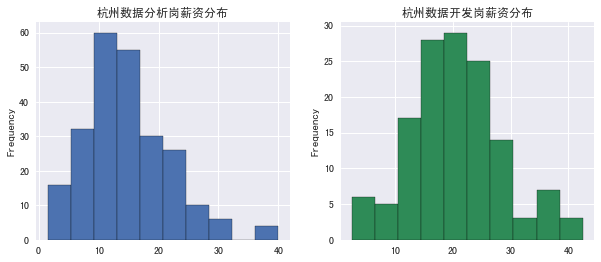

In [89]:
plt.subplot(121)
hz_df[hz_df.pos_tp=='分析'].average.plot.hist(edgecolor='black',title='杭州数据分析岗薪资分布',figsize=(10,4))
plt.subplot(122)
hz_df[hz_df.pos_tp=='开发'].average.plot.hist(edgecolor='black',title='杭州数据开发岗薪资分布',figsize=(10,4),color='seagreen')
plt.show()

可以看出分析岗的薪资集中在10-15k，而开发岗集中在20k左右
由于爬虫爬取的信息前段都是分析岗，后段开发岗为主，挖掘和产品较少，所以不做分析。

### 1.2 公司规模和学历

In [90]:
#统计不同规模公司对不同学历的需求比例
cosize_edu=hz_df.loc[hz_df.pos_tp=='分析'].groupby('company_size').apply(lambda x:x.education).unstack().T.\
apply(lambda x:x.value_counts()).apply(lambda x:x/x.sum())
cosize_edu

company_size,15-50人,150-500人,15人,2000人以上,50-150人,500-2000人
大专及以上,0.125,0.131148,1.0,0.122449,0.257143,0.118421
学历不限,NaN,0.016393,NaN,0.061224,0.028571,0.013158
本科及以上,0.750,0.770492,NaN,0.775510,0.714286,0.815789
硕士及以上,0.125,0.081967,NaN,0.040816,NaN,0.052632


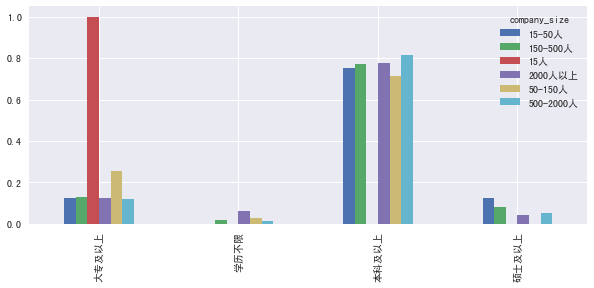

In [91]:
cosize_edu.plot.bar(figsize=(10,4))

有5%的500人以上的中大公司职位对分析岗学历要求硕士及以上，150-500人的中型公司中比500人以上的要求更高一点，达到8%

### 1.3 公司规模和工作经验

In [92]:
#统计不同规模公司对不同工作经验的需求比例
cosize_wyr=hz_df.loc[hz_df.pos_tp=='分析'].groupby('company_size').apply(lambda x:x.work_year).unstack().T.\
apply(lambda x:x.value_counts()).apply(lambda x:x/x.sum())
cosize_wyr

company_size,15-50人,150-500人,15人,2000人以上,50-150人,500-2000人
1-3年,0.4375,0.278689,0.5,0.204082,0.428571,0.421053
1年以下,NaN,0.016393,NaN,0.020408,NaN,0.013158
3-5年,0.1875,0.475410,0.5,0.510204,0.371429,0.407895
5-10年,NaN,0.065574,NaN,0.040816,0.028571,0.078947
不限,0.2500,0.098361,NaN,0.102041,0.085714,0.065789
应届毕业生,0.1250,0.065574,NaN,0.122449,0.085714,0.013158


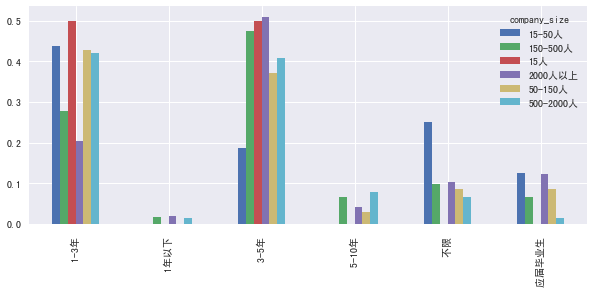

In [93]:
cosize_wyr.plot.bar(figsize=(10,4))

2000人以上的大公司对经验要求最高，所以如果是转行者或者经验不足的选择150人以下的小公司机会会多一点

### 1.4 学历和薪资

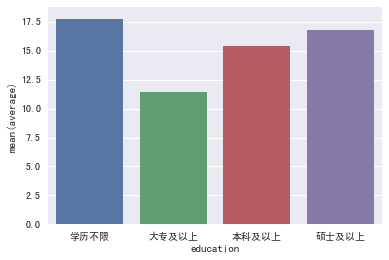

In [94]:
sns.barplot(x='education',y='average',data=hz_df.loc[hz_df.pos_tp=='分析'],
            ci=False,order=['学历不限','大专及以上','本科及以上','硕士及以上'])
plt.show()

可以看出大专和本科差距还是挺明显的，本科和硕士的差距则相对较小

### 1.5 地区和薪资

In [97]:
hz_df.work_addr.value_counts()

西湖区    146
滨江区    106
余杭区     60
拱墅区     54
江干区     32
下城区     15
萧山区      9
上城区      5
富阳市      1
开发区      1
Name: work_addr, dtype: int64

西湖区的工作机会最多，其次为滨江

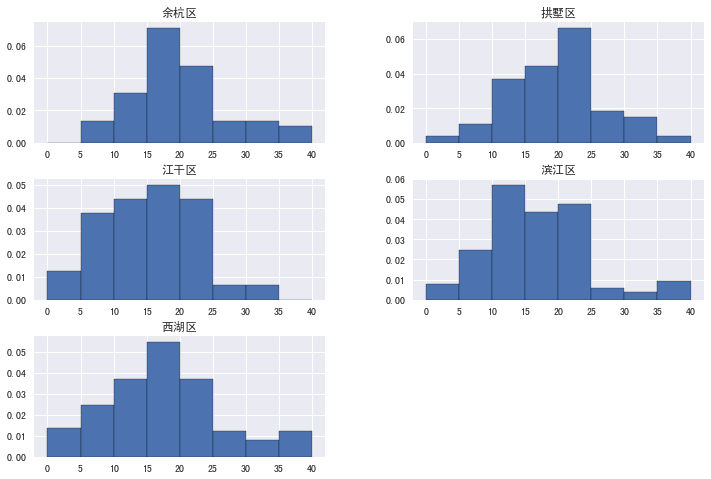

In [115]:
#不同地区薪资分布
hz_df.groupby('work_addr').apply(lambda x:x.average).unstack().T.\
loc[:,['西湖区','滨江区','余杭区','拱墅区','江干区']].hist(figsize=(12,8),edgecolor='black',normed=1,bins=range(0,45,5))
plt.show()

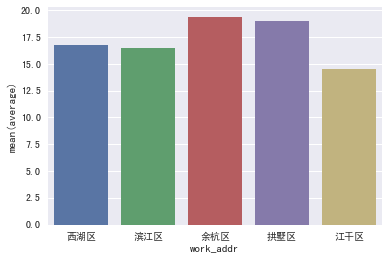

In [120]:
#不同地区平均薪资
sns.barplot(x='work_addr',y='average',data=hz_df[hz_df.work_addr.isin(['西湖区','滨江区','余杭区','拱墅区','江干区'])],
            ci=False,order=['西湖区','滨江区','余杭区','拱墅区','江干区'])
plt.show()

可以看出，余杭区是薪资最高的，原因杭州小伙伴应该都知道，阿里西溪园区带动了未来科技城的发展，越来越多的高科技公司到那里扎根，
所以仓前房价也水涨船高，拱墅区这么高薪资还是有点出乎我意料，应该是北软那一块需求量大，西湖区和滨江区不分伯仲，江干区薪水则略低一筹。

### 1.6 地区和公司规模

In [125]:
hz_df_main=hz_df[hz_df.work_addr.isin(['西湖区','滨江区','余杭区','拱墅区','江干区'])]

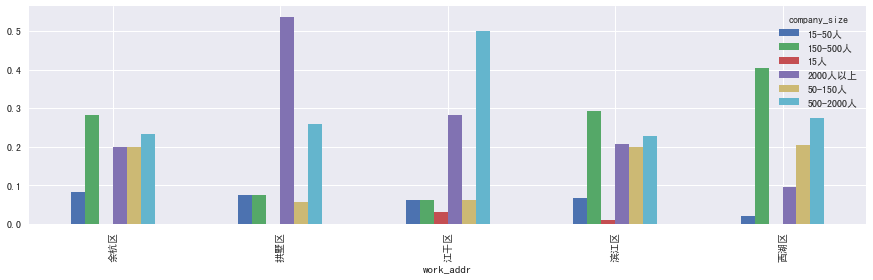

In [132]:
#各地区不同规模公司占比图
pd.crosstab(hz_df_main.company_size,hz_df_main.work_addr).apply(lambda x:x/x.sum()).T.plot.bar(figsize=(15,4))
plt.show()

可以看到，余杭区和滨江区不同规模的公司分布还是挺均匀多，需求量最大的公司规模是150-500人点公司，拱墅区500人以上的大公司特别多，  
江干区也是，西湖区则150-500和500-2000人的中大型公司居多一点

## 2. 岗位描述词云分析

### 2.1 中文词云分析

In [143]:
content1=hz_df.job_desc.str.replace('[^\u4e00-\u9fa5]','')

In [144]:
content1.head()

0    负责运营团队管理数据整理工作负责核心指标体系持续跟踪工作相关项目的数据分析需求跨部门沟通并推...
1    工作职责具有计算机等相关专业本科及以上学历编程基础扎实熟悉操作系统有较丰富等开发经验熟悉和计...
2    岗位职责深入理解业务运作和产品特点通过数据分析建立模型以获取用户画像对运营产品销售等数据进行...
3    岗位名称数据产品经理需求人数重点要求具有大数据云计算数据仓库数据挖掘的技术背景为佳有数据系统...
4    岗位描述构建全面的准确的能反映服务业务线特征的整体指标体系并基于业务监控指标体系及时发现与定...
Name: job_desc, dtype: object

In [145]:
#在分词时设置HMM＝False才起作用，因为可能计算新词，jieba.del_word('WWW')

In [171]:
jieba.analyse.set_stop_words("../文本/stop_words.txt")

In [172]:
clist=[]
for sentence in content1:
    clist.append(jieba.analyse.extract_tags(sentence))

In [173]:
text1=str(clist)

In [174]:
text1=re.sub('[\s\'\[\]]','',text1)

In [175]:
jieba.analyse.extract_tags(text1,20,True)

[('数据', 0.19327693271047708),
 ('数据挖掘', 0.17227213658347826),
 ('经验', 0.16811398907549943),
 ('数据仓库', 0.1475030067925382),
 ('建模', 0.13083342249774385),
 ('业务', 0.10887909718106112),
 ('分析', 0.10586492750298471),
 ('海量', 0.08486652715299882),
 ('开发', 0.07988341297221505),
 ('数据库', 0.07544407922202584),
 ('逻辑思维', 0.0750256307047591),
 ('数据模型', 0.0667360529107168),
 ('团队', 0.06643073008846063),
 ('电商', 0.06499480473296122),
 ('提供数据', 0.06132951411927144),
 ('运营', 0.06002679712165217),
 ('抗压', 0.058122167133443),
 ('数据处理', 0.05620720832214218),
 ('本科', 0.05496494751436193),
 ('统计学', 0.05344686608249119)]

In [176]:
keywords_freq1=jieba.analyse.extract_tags(text1,120,True)

In [177]:
freq_dict1={}
for item in keywords_freq1:
    freq_dict1[item[0]]=item[1]

In [178]:
ciyun1=WordCloud(width = 800, height = 600,font_path='/System/Library/Fonts/SimHei.ttf').\
generate_from_frequencies(freq_dict1)

(-0.5, 799.5, 599.5, -0.5)

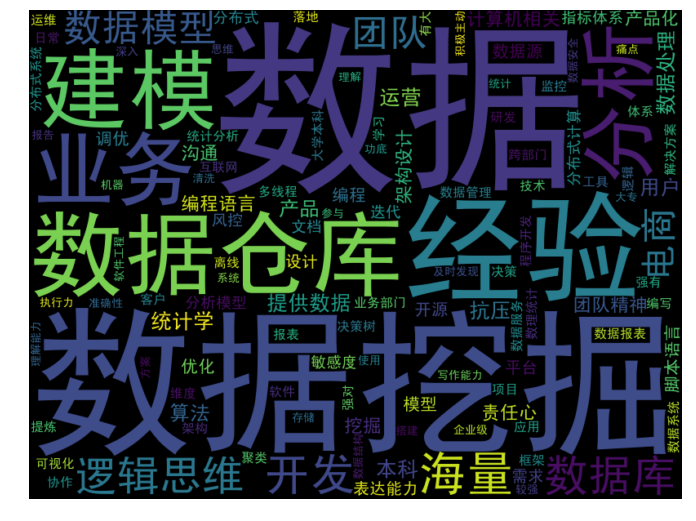

In [179]:
plt.figure(figsize=(12,9))
plt.imshow(ciyun1,interpolation='bilinear')
plt.axis("off")

通过对杭州地区岗位描述的中文词云可以看出，公司看重分析师的经验，然后数据分析嘛，分析是必不可少的，其次就是对于业务的理解，因为数据分析都是要和业务结合的嘛。  
在硬实力上要求分析师会数据挖掘和建模，然后是一些比如逻辑思维、抗压、责任心、表达能力、团队精神等软性能力的要求
然后其他的比如开发、数据仓库都是对数据开发岗位的要求。  

### 2.2 英文词云分析

In [211]:
content2=hz_df.job_desc.str.replace('[\u4e00-\u9fa5\n]|[^A-Za-z\-，,]',' ')

In [212]:
text2=str(list(content2)).upper()

In [213]:
re.findall('S.{0,6}LEARN',text2)

['SCIKIT-LEARN',
 'SK-LEARN',
 'SCIKIT-LEARN',
 'SCIKIT-LEARN',
 'SCIKIT-LEARN',
 'SCIKIT-LEARN',
 'SCIKIT-LEARN']

In [214]:
#将scikit-learn和sk-learn统一为sklearn
text2=re.sub('S.{0,6}LEARN','SKLEARN',text2)

In [215]:
jieba.analyse.set_idf_path("../文本/idf.txt") 

In [216]:
jieba.analyse.set_stop_words("../文本/stop_words.txt")

In [217]:
keywords_freq=jieba.analyse.extract_tags(text2,topK=120,withWeight=True)

In [220]:
#top20技能关键词
keywords_freq[:20]

[('SQL', 0.9717654359292585),
 ('PYTHON', 0.6850760161340366),
 ('HADOOP', 0.5808253180266832),
 ('HIVE', 0.5584858827179646),
 ('SPARK', 0.5398696866273658),
 ('JAVA', 0.45423518461061124),
 ('ETL', 0.33881476884889855),
 ('EXCEL', 0.33509152963077876),
 ('MYSQL', 0.3201985727582997),
 ('SAS', 0.29785913744958115),
 ('SPSS', 0.2792429413589823),
 ('HBASE', 0.2755197021408625),
 ('LINUX', 0.25318026683214395),
 ('SHELL', 0.22711759230530562),
 ('ORACLE', 0.18616196090598822),
 ('STORM', 0.16754576481538938),
 ('PPT', 0.1563760471610301),
 ('BI', 0.12659013341607198),
 ('KAFKA', 0.11914365497983245),
 ('APP', 0.08191126279863481)]

In [255]:
freq_dict={}
for item in keywords_freq:
    freq_dict[item[0]]=item[1]
#或者用 dict((item[0],item[1]) for item in keywords_freq)

In [263]:
ciyun2=WordCloud(width = 800, height = 600,random_state=1,font_path='/System/Library/Fonts/SimHei.ttf').\
generate_from_frequencies(freq_dict)

(-0.5, 799.5, 599.5, -0.5)

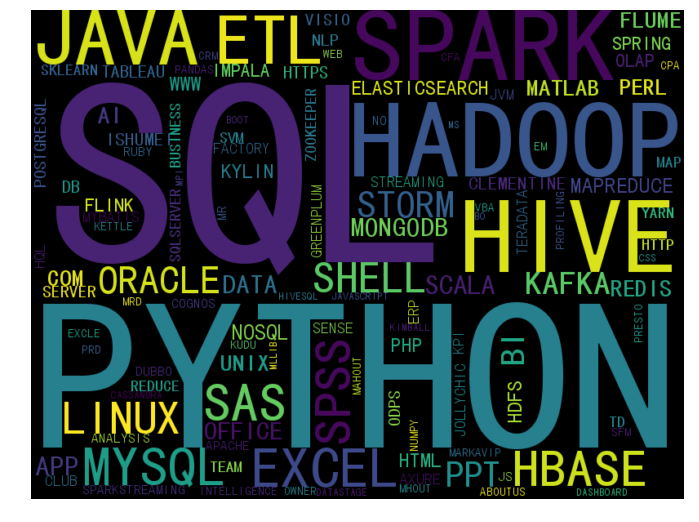

In [264]:
plt.figure(figsize=(12,9))
plt.imshow(ciyun2,interpolation='bilinear')
plt.axis("off")

可以看出在杭州，对于数据分析师这一岗位最主要的技能要求是SQL、PYTHON(没能把R分出来)、HADOOP、HIVE、SPARK，  
紧随其后的JAVA、ETL是数据开发岗位的要求，传统一点的工具，比如EXCEL、SPSS、SAS在互联网公司的使用就没那么多了，  
可见数据分析师最需要掌握的技能是SQL和python，要往大数据方向走，HADOOP、HIVE、SPARK也是必不可少的

## 3. 技能和薪资
    上一节已经画出了数据分析相关技能的词云图，这一节来看一下掌握不同的技能对薪资有什么影响

In [467]:
hz_df.head()

,link-href,department,job_title,salary,work_place,work_year,education,work_type,publish_time,job_advantage,...,work_addr,company_name,company_industry,company_state,home_page,company_size,pos_tp,bottom,top,average
0,https://www.lagou.com/jobs/3333115.html,浙江执御信息技术有限公司运营部门招聘,数据分析师,10k-20k,杭州,3-5年,学历不限,全职,09:19 发布于拉勾网,"晋升空间,团队管理,年终奖金,旅游活动",...,拱墅区,浙江执御信息技术有限公司 ...,"移动互联网,数据服务",B轮,NaN,2000人以上,分析,10,20,15.0
1,https://www.lagou.com/jobs/2562334.html,滴滴出行大数据招聘,三维重建视觉算法工程师--...,25k-50k,杭州,3-5年,硕士及以上,全职,12:04 发布于拉勾网,15薪、六险一金、期权、体检,...,西湖区,滴滴出行 ...,移动互联网,不需要融资,http://www.didichuxing.com,2000人以上,挖掘,25,50,37.5
2,https://www.lagou.com/jobs/3850946.html,深圳雅乐运营部招聘,数据分析师,10k-20k,杭州,1-3年,本科及以上,全职,15:19 发布于拉勾网,"做五休二,五险一金,年度体检,无限零食",...,西湖区,深圳雅乐 ...,"移动互联网,电子商务",A轮,http://www.lagou.com/gong...,50-150人,分析,10,20,15.0
3,https://www.lagou.com/jobs/3596055.html,蜂融网络产品部招聘,数据产品经理,10k-20k,杭州,1-3年,本科及以上,全职,09:32 发布于拉勾网,"发展迅速,全员持股,国外旅游,不打卡",...,西湖区,蜂融网络 ...,"移动互联网,金融",A轮,NaN,50-150人,产品,10,20,15.0
4,https://www.lagou.com/jobs/3990582.html,酷家乐研发部招聘,数据分析专家,22k-35k,杭州,3-5年,本科及以上,全职,2天前 发布于拉勾网,期权激励、年度旅游、弹性工作、氛围欢乐,...,拱墅区,酷家乐 ...,移动互联网,D轮及以上,NaN,500-2000人,分析,22,35,28.5


In [545]:
#取词频前15的关键词，计算包含关键词的岗位的中位数薪资
salary=[]
for tup in keywords_freq[:20]:
    salary.append(hz_df.loc[hz_df['job_desc'].str.upper().str.contains(tup[0]),'average'].mean())

In [548]:
#由Series生成Dataframe只能按行,元祖列表可以生成一个Series然后用str切片分成两个Series
keword_salary=pd.DataFrame([pd.Series(keywords_freq[:20]).str[0],pd.Series(keywords_freq[:20]).str[1],pd.Series(salary)],
            index=['keyword','freq','salary']).T

In [572]:
keword_salary.sort_values('salary',ascending=False)

,keyword,freq,salary
11,HBASE,0.274311,21.8846
4,SPARK,0.537501,21.6667
17,BI,0.126035,21.5167
2,HADOOP,0.578277,21.3858
15,STORM,0.166811,21.3372
5,JAVA,0.452242,20.7804
18,KAFKA,0.118621,20.6212
3,HIVE,0.556036,19.808
6,ETL,0.337328,19.4167
1,PYTHON,0.68207,18.9972


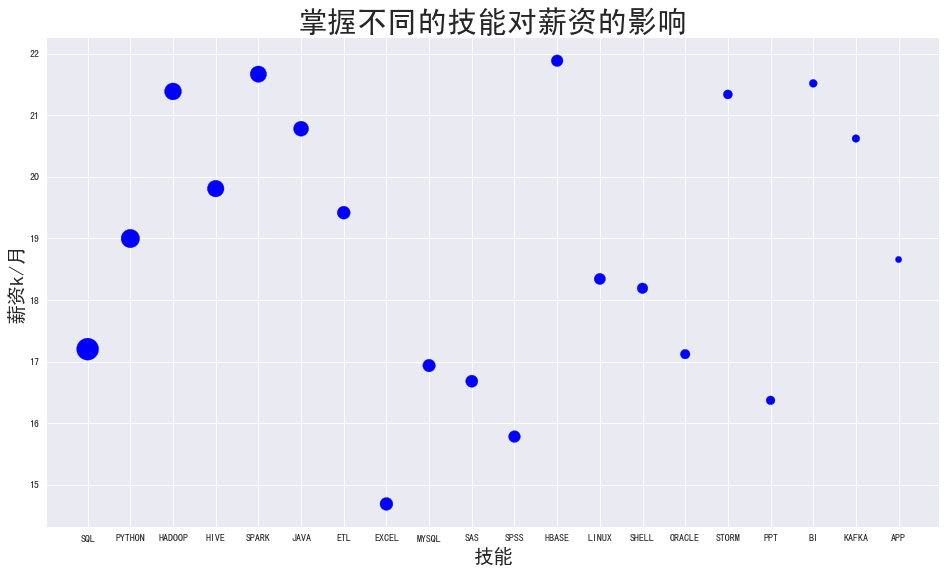

In [570]:
plt.figure(figsize=(16,9))
plt.scatter(keword_salary.index,keword_salary['salary'],(keword_salary['freq']*500).astype('int'),color='b')
plt.xticks(range(len(keword_salary)),keword_salary['keyword'])
plt.xlabel('技能',fontsize=20)
plt.ylabel('薪资k/月',fontsize=20)
plt.title('掌握不同的技能对薪资的影响',fontsize=30)
plt.show()

薪资最高的前几个关键词是HBASE、SPARK、BI、HADOOP、STORM，BI是商务智能的意思，主要是数据开发，  
其他几个都是和大数据相关的分布式数据存储技术，这也和之前分析的大数据和非大数据的薪资差异相符，想要拿高薪还得往大数据领域靠。  
另外，掌握sql是获得一份相对还可以的薪资的基础，而EXCEL则是所有技能里薪资最低的，然后是SPSS，SAS，PPT，这都是相对传统的公司使用的工具。

## 分析结论
### 全国范围的分析
**1**.和数据相关的岗位，主要的工作机会集中在北上深杭广这5个城市。公司规模在150-500的中型公司和50-150的中小型公司对这类岗位的需求量最大，然后是15-50人的小公司，500人以上的大公司需求量相对较小，可能本身从公司数量上来说大公司也少一点，中小公司多一点。  
**2**.在互联网领域招聘数据相关岗位的公司行业，主要是移动互联网、金融、数据服务、电子商务、O2O，企业服务。  
**3**.按照招聘的岗位类型划分来排序，需求量最高的是技术岗，属于第一梯队，然后是第二梯队的产品岗和运营岗，第三梯队为市场与销售、设计和金融。  
**4**.全国的数据相关岗位薪资分布集中在5k－25k/月，也有很多高于这个区间的收入，所以分布属于左偏分布，就是传说中的你的薪资被平均了。需求量排位前5的城市中，北京的整体薪资是最高的，然后是上海和深圳，杭州比上海深圳略低一点，最后是广州，广州的薪资基本调出第一梯队了，和二线城市相当，在二线城市中，苏州脱颖而出，成为整体薪资较高的那个城市，所以笔者认为广州可以被评选性价比最低城市，而苏州则是性价比最高城市。  
**5**.在学历要求上，本科的要求达到76%，不限学历、大专和本科占到95%，所以拥有本科文凭起码在学历上已经满足95%的企业招聘要求了。学历越高，薪资的上限也越高。  
**6**.在工作经验要求上，3-5年工作经验的人才是最受企业欢迎的其次是1-3年，对于要求5年以上工作经验的岗位并不多，可以看出这是一个很偏年轻化的职业，一方面和数据技术是这几年才火起来对有关，还有一方面和互联网人才年龄结构本身偏年轻化化有关。当然随着工作经验的提升，薪资能有非常明显的涨幅。  
**7**.不同类型的岗位的薪资也有明显差异，笔者将数据相关岗位分为4类：分析岗、挖掘岗、产品岗、开发岗。挖掘岗的在高段位的薪资相比其他几个类别占比最高，说明挖掘的薪资上限很高。分析岗是低段位薪资占比最高的，产品和开发岗位是中间段薪资占比相对较高的，所以未来想拿更高薪水的同学还是得往数据挖掘和机器学习上走，但是挖掘岗也是对学历要求最高的，本科想要从事挖掘岗对经验的要求会比较高，而且薪资上限不如硕士，所以最好还是考个研。另外，和大数据相关的岗位薪资明显高于非大数据的岗位。  
**8**.从公司规模来看，公司越大，平均薪资越高，同时对学历要求也会不一样。2000人以上的大公司对学历要求是最高的，150-500人的学历要求最宽松，可能和这个发展阶段的公司对人才需求比较急切有关。工作经验并不能弥补学历上的不足，不同规模的公司在招人时并不会因为工作经验的增加而降低对学历的要求。
### 杭州地区的分析
**1**.杭州地区对数据分析需求量最大的几个区依次是西湖区、滨江区、余杭区、拱墅区、江干区。薪资水平由高到低排依次是余杭区、拱墅区、西湖区、滨江区、江干区，拱墅区薪资较高和样本量较少有关系。  
**2**.不同地区的岗位对应的不同公司规模的占比也不一样，余杭区和滨江区不同规模的公司分布还是挺均匀多，需求量最大的公司规模是150-500人点公司，拱墅区500人以上的大公司特别多，江干区也是，西湖区则150-500和500-2000人的中大型公司居多一点。  
**3**.按岗位来分，数据分析岗主要薪资集中10-15k，数据开发集中在20k左右。  
**4**.学历上来看，有5%的500人以上的中大公司职位对分析岗学历要求硕士及以上,150-500人的中型公司中比500人以上的要求更高一点，达到8%。这个和全国的比例差不多。同时，学历越高对应的平均薪资也越高，这个和全国范围的分析一致。  
**5**.工作经验上来看，大公司对工作经验的要求会更高一点，这个在全国范围应该是比较一致的。  
**6**.从岗位描述的词频词云分析来看：中文关键词的分析显示，企业看重工作经验，然后看重对于业务的理解。硬实力上要会数据挖掘建模，软性能力上要求逻辑思维、抗压、责任心、表达能力、团队精神等；英文关键词的分析显示，对于数据分析师这一岗位最主要的技能要求是SQL、PYTHON(没能把R分出来)、HADOOP、HIVE、SPARK，传统一点的工具，比如EXCEL、SPSS、SAS在互联网公司的使用就没那么多了，可见数据分析师最需要掌握的技能是SQL和python，要往大数据方向走，HADOOP、HIVE、SPARK也是必不可少的。  
**7**.在所有这些技能当中，掌握HBASE、SPARK、HADOOP、STORM的相关技能薪资是最高的，都是和海量数据处理相关的，这也和之前分析的大数据和非大数据的薪资差异相符，想要拿高薪还得往大数据领域靠。另外，掌握sql是获得一份相对还可以的薪资的基础(词频达到96%)，SPSS，SAS，EXCEL，PPT这些传统公司用得较多的工具相对薪资都偏低。

## 思考

本次分析在作图时使用了matplotlib包、pandas封装的继承自matplotlib的绘图功能、seaborn绘图包。同一类型的图用不同的包来画有不同的数据格式要求，笔主在实践过程中也尝试了用每一种包来绘图，也尝试了用不同方法来生成满足绘图要求的数据格式，所以有些绘图可以采用更加精简的代码实现，在工作当中肯定是实现同样的功能代码越精简越好，例如，在一个分类变量A的每一类别下，另一分类变量B的每一类别的数量占比，复杂的方法可以使用"groupby'A'、apply保留B、出盏unstack、apply(value_counts)、apply(对每一个A分类计算每一个B分类的比例)"，精简方法"crosstab或者pivot_table生成A和B的列联表、apply(对每一个A分类计算每一个B分类的比例)"。  
在词云分析的技能英文关键词分析中，笔者没能分出R语言的R，这一环节想要得到提升还需要学习大量的分词专业知识，等未来积累了足够的知识后再回过头来尝试。

## matplotlib可用颜色一览

In [193]:
#前面都是xkcd颜色
colors.get_named_colors_mapping()

{'xkcd:cloudy blue': '#acc2d9',
 'xkcd:dark pastel green': '#56ae57',
 'xkcd:dust': '#b2996e',
 'xkcd:electric lime': '#a8ff04',
 'xkcd:fresh green': '#69d84f',
 'xkcd:light eggplant': '#894585',
 'xkcd:nasty green': '#70b23f',
 'xkcd:really light blue': '#d4ffff',
 'xkcd:tea': '#65ab7c',
 'xkcd:warm purple': '#952e8f',
 'xkcd:yellowish tan': '#fcfc81',
 'xkcd:cement': '#a5a391',
 'xkcd:dark grass green': '#388004',
 'xkcd:dusty teal': '#4c9085',
 'xkcd:grey teal': '#5e9b8a',
 'xkcd:macaroni and cheese': '#efb435',
 'xkcd:pinkish tan': '#d99b82',
 'xkcd:spruce': '#0a5f38',
 'xkcd:strong blue': '#0c06f7',
 'xkcd:toxic green': '#61de2a',
 'xkcd:windows blue': '#3778bf',
 'xkcd:blue blue': '#2242c7',
 'xkcd:blue with a hint of purple': '#533cc6',
 'xkcd:booger': '#9bb53c',
 'xkcd:bright sea green': '#05ffa6',
 'xkcd:dark green blue': '#1f6357',
 'xkcd:deep turquoise': '#017374',
 'xkcd:green teal': '#0cb577',
 'xkcd:strong pink': '#ff0789',
 'xkcd:bland': '#afa88b',
 'xkcd:deep aqua': '#0

In [180]:
#除去xkcd颜色，看看其他颜色
[(k,v) for k,v in colors.get_named_colors_mapping().items() if k[0:4]!='xkcd']

[('aliceblue', '#F0F8FF'),
 ('antiquewhite', '#FAEBD7'),
 ('aqua', '#00FFFF'),
 ('aquamarine', '#7FFFD4'),
 ('azure', '#F0FFFF'),
 ('beige', '#F5F5DC'),
 ('bisque', '#FFE4C4'),
 ('black', '#000000'),
 ('blanchedalmond', '#FFEBCD'),
 ('blue', '#0000FF'),
 ('blueviolet', '#8A2BE2'),
 ('brown', '#A52A2A'),
 ('burlywood', '#DEB887'),
 ('cadetblue', '#5F9EA0'),
 ('chartreuse', '#7FFF00'),
 ('chocolate', '#D2691E'),
 ('coral', '#FF7F50'),
 ('cornflowerblue', '#6495ED'),
 ('cornsilk', '#FFF8DC'),
 ('crimson', '#DC143C'),
 ('cyan', '#00FFFF'),
 ('darkblue', '#00008B'),
 ('darkcyan', '#008B8B'),
 ('darkgoldenrod', '#B8860B'),
 ('darkgray', '#A9A9A9'),
 ('darkgreen', '#006400'),
 ('darkgrey', '#A9A9A9'),
 ('darkkhaki', '#BDB76B'),
 ('darkmagenta', '#8B008B'),
 ('darkolivegreen', '#556B2F'),
 ('darkorange', '#FF8C00'),
 ('darkorchid', '#9932CC'),
 ('darkred', '#8B0000'),
 ('darksalmon', '#E9967A'),
 ('darkseagreen', '#8FBC8F'),
 ('darkslateblue', '#483D8B'),
 ('darkslategray', '#2F4F4F'),
 ('dark